In [1]:
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn import metrics
import math
from math import sqrt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from sklearn.model_selection import TimeSeriesSplit

from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

#importing the different randoms
import os
import numpy.random as nr
import random as rn
import tensorflow as tf

np.random.seed(24)
tf.random.set_seed(24)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

os.environ['PYTHONHASHSEED']='0'
nr.seed(24)

In [2]:
def select_country(df, name, features, target):
    country = df[df['Country'] == name]
    data = country[['Year'] + features + [target]].copy()
    data['Year'] = pd.to_datetime(data['Year'], format='%Y')
    data = data.set_index('Year')
    return data

In [3]:
def split_sequence(X, y, n_in, n_out):
    X_seq, y_seq = [], []
    for i in range(len(X)):
        end_ix = i + n_in
        out_end_ix = end_ix + n_out
        if out_end_ix > len(X):
            break
        seq_x, seq_y = X[i:end_ix], y[end_ix:out_end_ix]
        X_seq.append(seq_x)
        y_seq.append(seq_y)
    return np.array(X_seq), np.array(y_seq)

In [4]:
def metric(fcast, test):
    mae = mean_absolute_error(test, fcast)
    mse = mean_squared_error(test, fcast)
    rmse = sqrt(mse)
    mape = mean_absolute_percentage_error(test, fcast)
    print(f'MAE : {mae}')
    print(f'MSE : {mse}')
    print(f'RMSE : {rmse}')
    print(f'MAPE : {mape}')

In [5]:
def build_and_train_model(X_train, y_train, n_in, n_features, n_out, epochs=200, learning_rate=0.001, batch_size=32):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_in, n_features)),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(60, activation='relu'),
        tf.keras.layers.Dense(n_out)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    return model

In [8]:

emissions_log = pd.read_excel(r"C:\Users\DELL PC\Downloads\GHGlogtransformated.xlsx")
features = ['Energy']  
target = 'Total GHG emissions without LULUCF'


In [9]:
start_year = 2022
n_in, n_out = 4, 9
epochs = 1000
learning_rate = 0.0001

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Metrics for Australia (Fold 1):
MAE : 0.048181956861214736
MSE : 0.002872132154451802
RMSE : 0.05359227700379787
MAPE : 0.007658762411492454
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Australia (Fold 2):
MAE : 0.14390936626818687
MSE : 0.0208374930143556
RMSE : 0.14435197613595596
MAPE : 0.022878113244401282
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Australia (Fold 3):
MAE : 0.14145018669464746
MSE : 0.020358969404145066
RMSE : 0.14268486045879242
MAPE : 0.02254062370529282
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Metrics for Australia (Fold 4):
MAE : 0.1441542962014634
MSE : 0.02083242434171534
RMSE : 0.14433441842372643
MAPE : 0.022850594712820253
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
Metrics for Australia (Fold 5):
MAE : 0.1688438983215308
MSE : 0.02878659458006928
RMSE : 0.16966612679043888
MAPE : 0.02689196024183547
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
            CNN Forecast
2022-12-31      6.413205
2023-12-31      6.426915


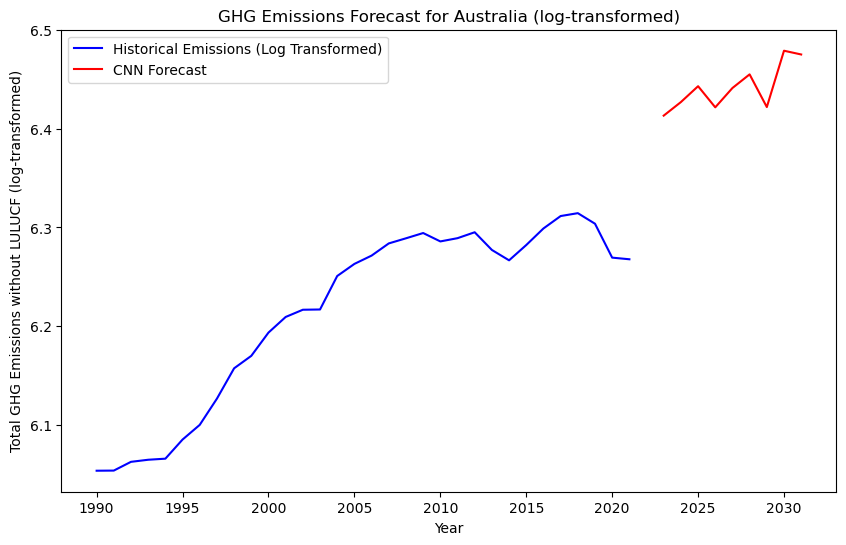

            CNN Forecast
2022-12-31    609.844910
2023-12-31    618.263550
2024-12-31    628.291748
2025-12-31    614.994751
2026-12-31    627.144409
2027-12-31    635.873962
2028-12-31    615.158081
2029-12-31    651.287659
2030-12-31    648.813843


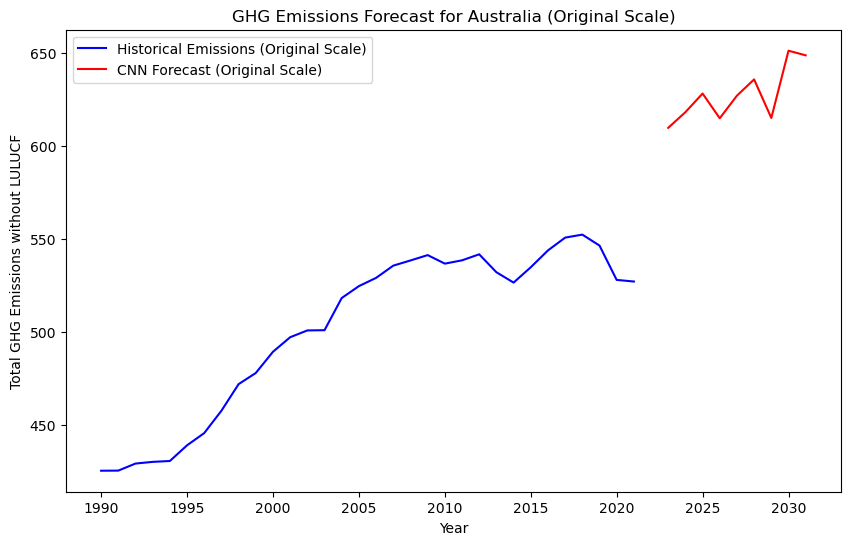

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Metrics for Austria (Fold 1):
MAE : 0.16264813271023057
MSE : 0.027534736057745913
RMSE : 0.16593593962052317
MAPE : 0.03670874853646627
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Austria (Fold 2):
MAE : 0.13387794641647321
MSE : 0.020719923413173413
RMSE : 0.1439441676941911
MAPE : 0.03042223917157379
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Metrics for Austria (Fold 3):
MAE : 0.31126113661806265
MSE : 0.09839871200838118
RMSE : 0.3136856898367874
MAPE : 0.07135983775389808
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Metrics for Austria (Fold 4):
MAE : 0.14244524621660806
MSE : 0.020944558692297114
RMSE : 0.14472235035507514
MAPE : 0.03248505792834593
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Metrics for Austria (Fold 5):
MAE : 0.09561840071342449
MSE : 0.009711236661504287
RMSE : 0.0985456070127141
MAPE : 0.022045964793995593
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
            CNN Forecast
2022-12-31      4.373944
2023-12-31      4.346020
2024-12-31    

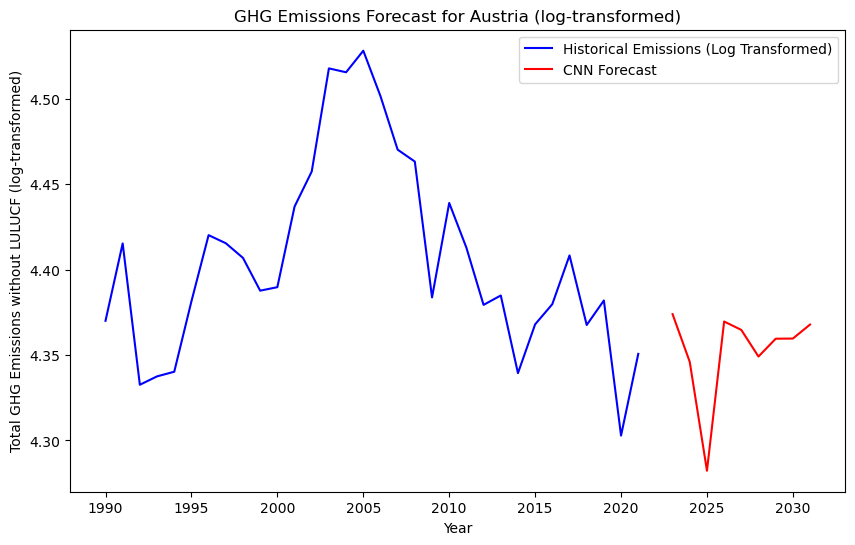

            CNN Forecast
2022-12-31     79.355980
2023-12-31     77.170731
2024-12-31     72.405785
2025-12-31     79.014984
2026-12-31     78.627556
2027-12-31     77.411430
2028-12-31     78.223602
2029-12-31     78.230576
2030-12-31     78.874390


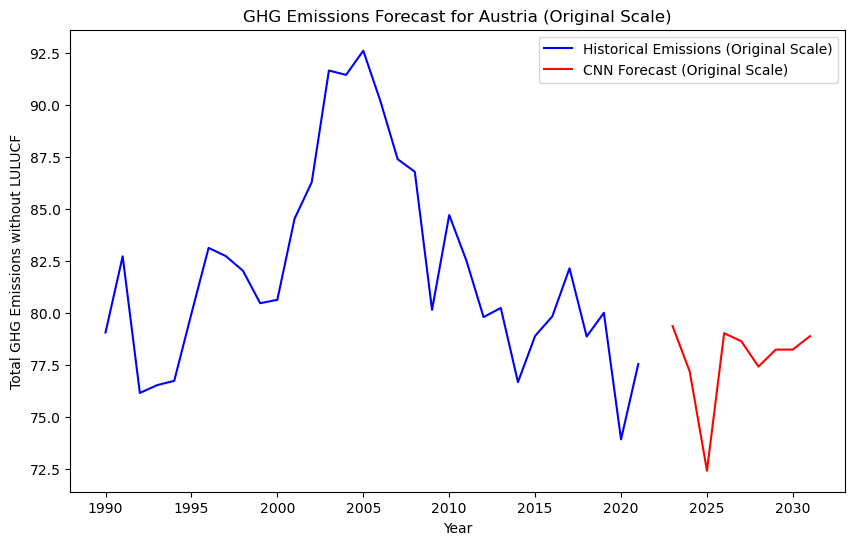

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Metrics for Belgium (Fold 1):
MAE : 0.1081335206512873
MSE : 0.013339187014148409
RMSE : 0.11549539823797488
MAPE : 0.022131585106881416
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Belgium (Fold 2):
MAE : 0.1057827462632505
MSE : 0.012740366037717644
RMSE : 0.11287322994278867
MAPE : 0.021962515069198458
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Metrics for Belgium (Fold 3):
MAE : 0.1477745702432071
MSE : 0.02231857894677035
RMSE : 0.1493940391942408
MAPE : 0.030989759750897166
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Belgium (Fold 4):
MAE : 0.09427445846879608
MSE : 0.00912994329868094
RMSE : 0.09555073677727943
MAPE : 0.019786390993951443
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Metrics for Belgium (Fold 5):
MAE : 0.07407795471678262
MSE : 0.006109047596664496
RMSE : 0.07816039659996932
MAPE : 0.01575150922856478
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
            CNN Forecast
2022-12-31      4.756106
2023-12-31      4.765961
2024-12-31  

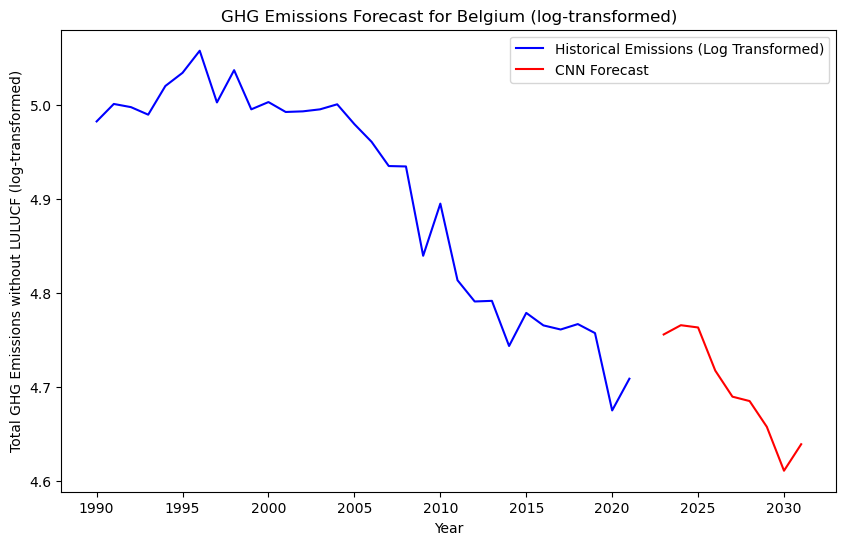

            CNN Forecast
2022-12-31    116.292236
2023-12-31    117.443939
2024-12-31    117.160980
2025-12-31    111.913971
2026-12-31    108.854950
2027-12-31    108.346169
2028-12-31    105.419693
2029-12-31    100.614952
2030-12-31    103.488602


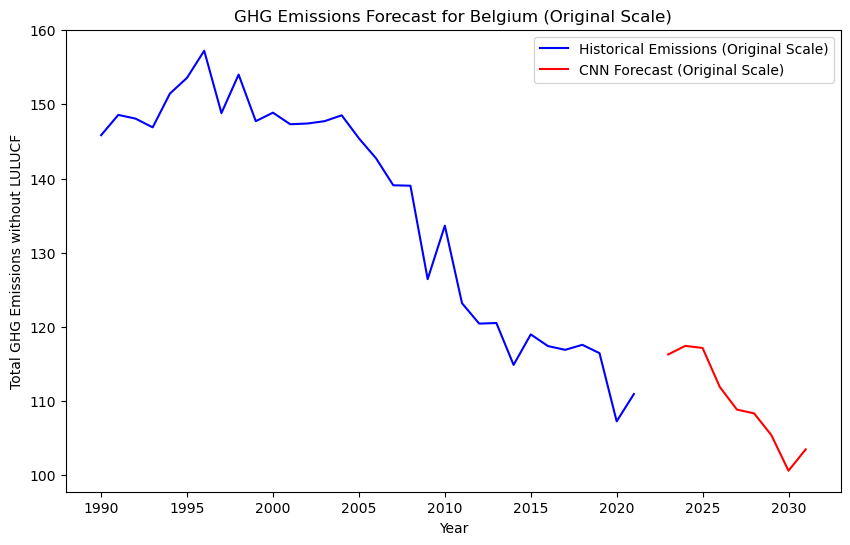

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Metrics for Bulgaria (Fold 1):
MAE : 0.1200344304602113
MSE : 0.017185954834882704
RMSE : 0.13109521286028222
MAPE : 0.02875637925819503
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Metrics for Bulgaria (Fold 2):
MAE : 0.1808961288350502
MSE : 0.036157164907095245
RMSE : 0.19015037445951888
MAPE : 0.04383829518658062
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Metrics for Bulgaria (Fold 3):
MAE : 0.03628487827813783
MSE : 0.0023879448305231745
RMSE : 0.04886660240412847
MAPE : 0.008876839660170948
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Bulgaria (Fold 4):
MAE : 0.04291818657897325
MSE : 0.0040945055511443845
RMSE : 0.06398832355316386
MAPE : 0.010672756917161338
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Bulgaria (Fold 5):
MAE : 0.07302090969655965
MSE : 0.006413258609390468
RMSE : 0.08008282343543131
MAPE : 0.018608867739300528
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
            CNN Forecast
2022-12-31      3.961490
2023-12-31      3.961694
20

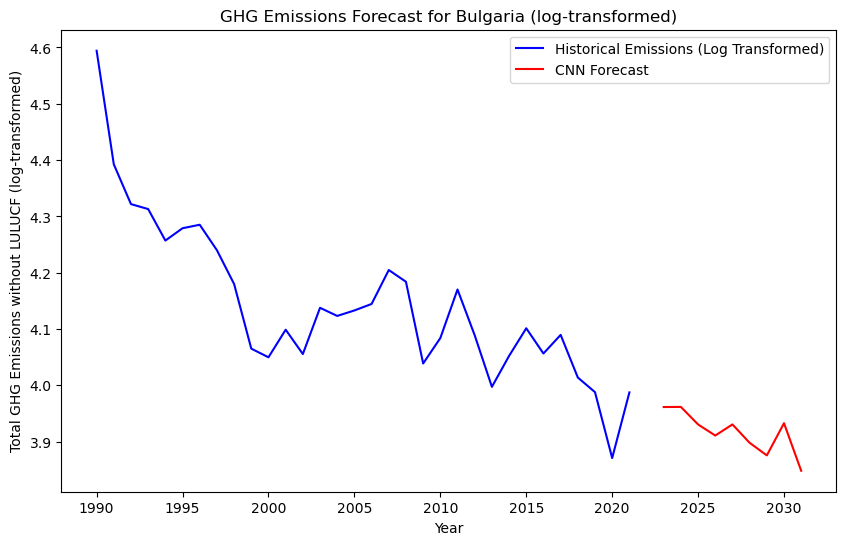

            CNN Forecast
2022-12-31     52.535549
2023-12-31     52.546261
2024-12-31     50.934334
2025-12-31     49.942577
2026-12-31     50.937664
2027-12-31     49.302624
2028-12-31     48.211422
2029-12-31     51.048225
2030-12-31     46.917221


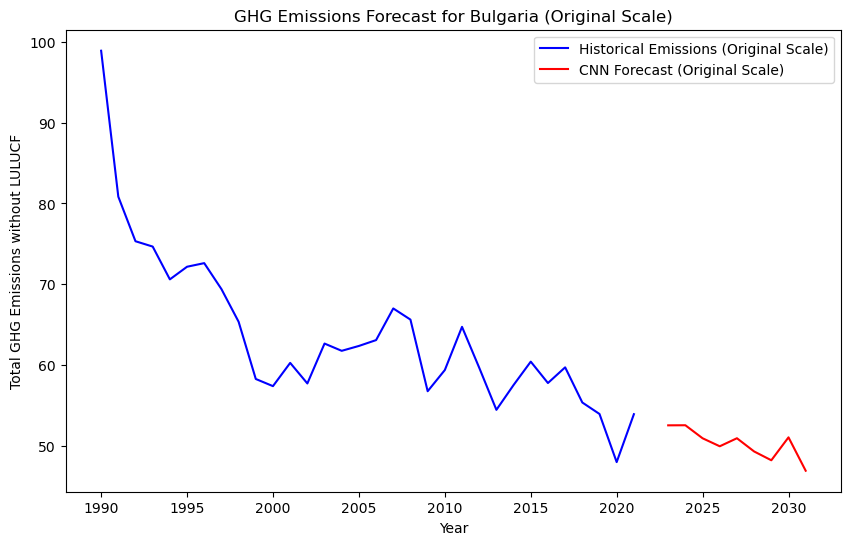

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Canada (Fold 1):
MAE : 0.08098950537357415
MSE : 0.009117470369645409
RMSE : 0.09548544585247225
MAPE : 0.012343896992285578
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Metrics for Canada (Fold 2):
MAE : 0.1472187117827645
MSE : 0.02169487192438251
RMSE : 0.14729179177531418
MAPE : 0.02242551715658964
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Metrics for Canada (Fold 3):
MAE : 0.11441883284587966
MSE : 0.013130791490422483
RMSE : 0.11458966572262301
MAPE : 0.01738348881197483
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Metrics for Canada (Fold 4):
MAE : 0.27808862082998215
MSE : 0.077338813185385
RMSE : 0.27809856739182426
MAPE : 0.04232306410830686
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Metrics for Canada (Fold 5):
MAE : 0.20523115049509943
MSE : 0.04269055801651587
RMSE : 0.2066169354542746
MAPE : 0.031464459419498964
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
            CNN Forecast
2022-12-31      6.136530
2023-12-31      6.351069
2024-12-31      6.

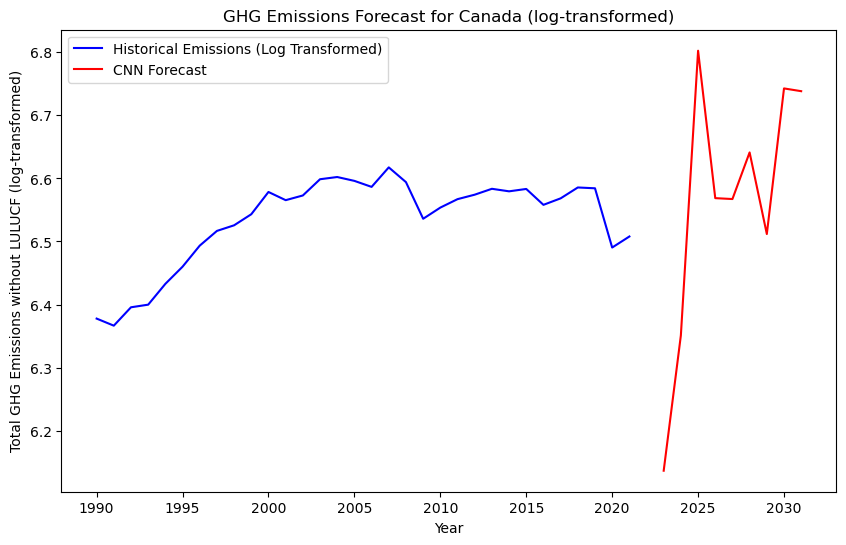

            CNN Forecast
2022-12-31    462.446014
2023-12-31    573.105286
2024-12-31    900.065247
2025-12-31    712.463989
2026-12-31    711.442200
2027-12-31    766.015503
2028-12-31    673.057922
2029-12-31    847.844421
2030-12-31    844.137207


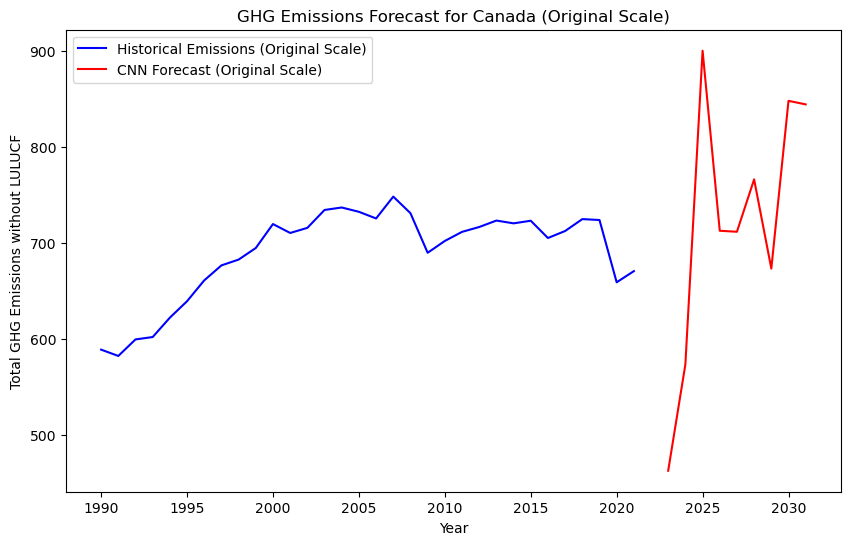

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Metrics for Czechia (Fold 1):
MAE : 0.06429664648746947
MSE : 0.004436553488544054
RMSE : 0.06660745820509933
MAPE : 0.012888062553231114
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Metrics for Czechia (Fold 2):
MAE : 0.026489338787517507
MSE : 0.0009686248004669028
RMSE : 0.03112273767628585
MAPE : 0.005368398987863117
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Metrics for Czechia (Fold 3):
MAE : 0.018474496826486646
MSE : 0.0003993428504947681
RMSE : 0.019983564509235285
MAPE : 0.003808168066574585
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Metrics for Czechia (Fold 4):
MAE : 0.007386250875917415
MSE : 8.552999517226003e-05
RMSE : 0.009248242815381743
MAPE : 0.0015159617744955449
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Metrics for Czechia (Fold 5):
MAE : 0.05807272480568818
MSE : 0.004074650862768936
RMSE : 0.06383299196159409
MAPE : 0.012198631696721987
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
            CNN Forecast
2022-12-31      4.735298
2023-12-31      4.72

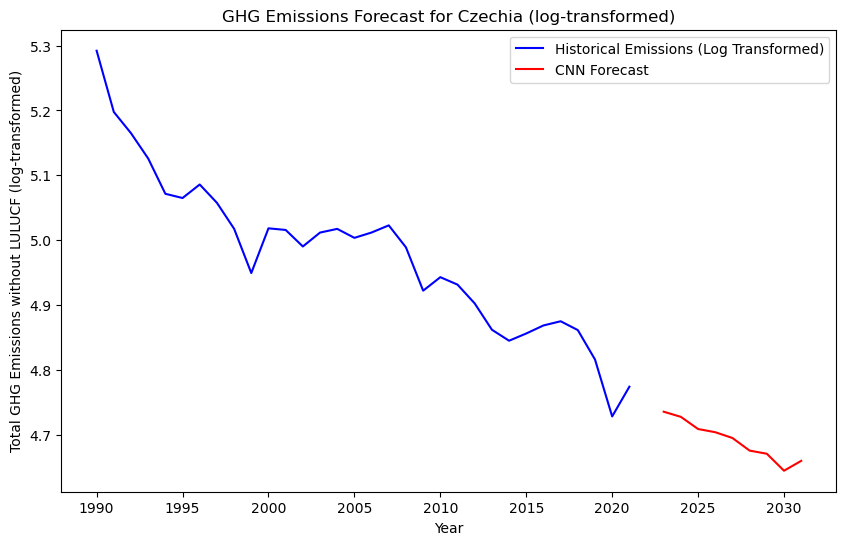

            CNN Forecast
2022-12-31    113.897415
2023-12-31    113.000603
2024-12-31    110.896896
2025-12-31    110.350899
2026-12-31    109.373848
2027-12-31    107.264801
2028-12-31    106.748329
2029-12-31    103.987419
2030-12-31    105.580772


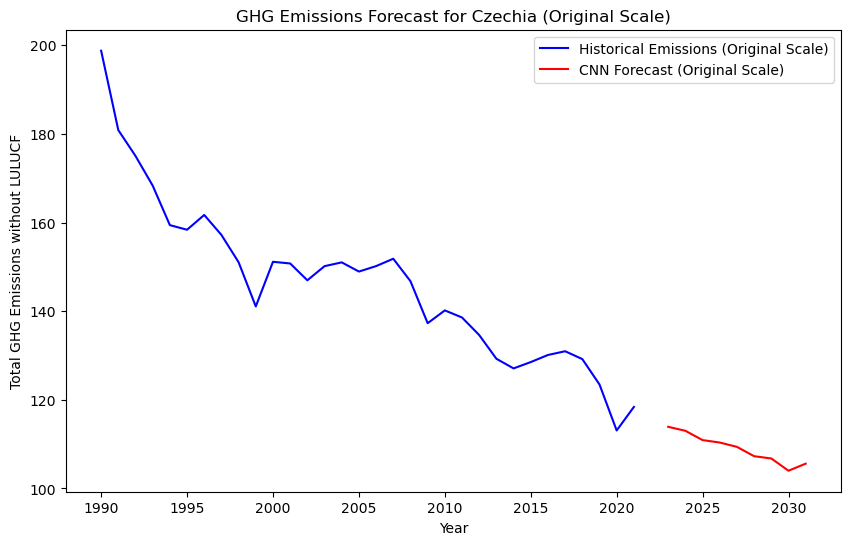

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Metrics for Denmark (Fold 1):
MAE : 0.15133531866619196
MSE : 0.02351947598043246
RMSE : 0.1533606076553965
MAPE : 0.035792019875446925
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Denmark (Fold 2):
MAE : 0.054168317687286326
MSE : 0.004460157743436084
RMSE : 0.06678441242862053
MAPE : 0.013345224343056933
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Denmark (Fold 3):
MAE : 0.1746268199932278
MSE : 0.03332389008525208
RMSE : 0.18254832260322765
MAPE : 0.04395834063474493
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Metrics for Denmark (Fold 4):
MAE : 0.16783541877137806
MSE : 0.02889483756551463
RMSE : 0.16998481569103352
MAPE : 0.0426216520387537
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
Metrics for Denmark (Fold 5):
MAE : 0.1512366771183946
MSE : 0.023059219253904233
RMSE : 0.1518526234673087
MAPE : 0.039591531403488665
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
            CNN Forecast
2022-12-31      3.735643
2023-12-31      3.693781
2024-12-31     

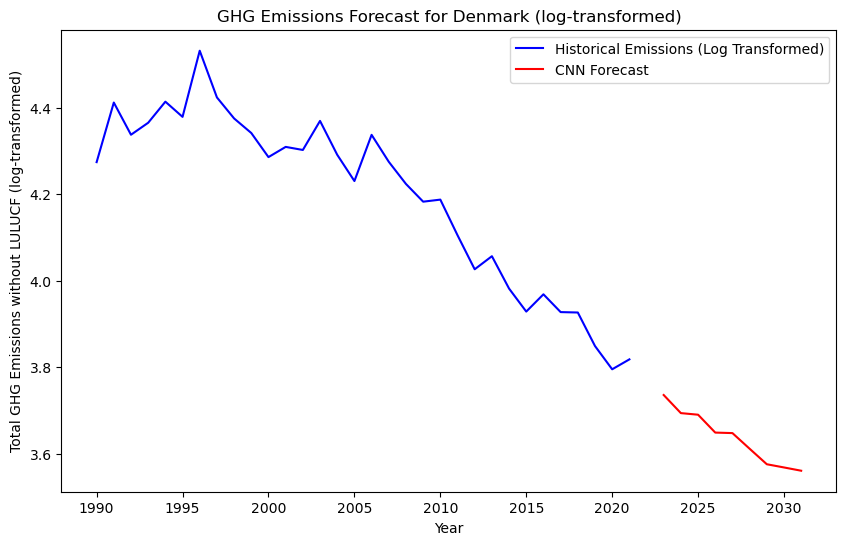

            CNN Forecast
2022-12-31     41.914974
2023-12-31     40.196548
2024-12-31     40.047829
2025-12-31     38.426208
2026-12-31     38.381329
2027-12-31     37.018059
2028-12-31     35.712841
2029-12-31     35.449326
2030-12-31     35.182507


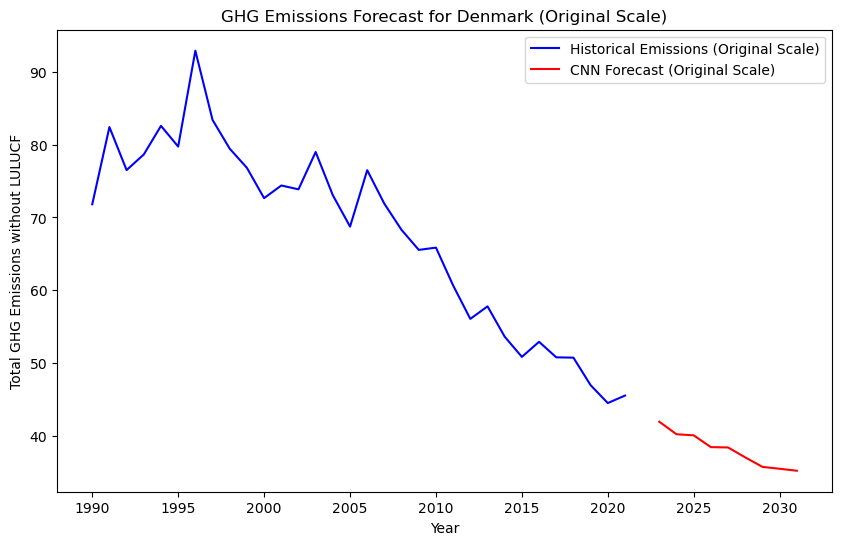

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Metrics for Finland (Fold 1):
MAE : 0.13617132546050215
MSE : 0.02099509553747635
RMSE : 0.14489684447038986
MAPE : 0.031953680707627975
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Metrics for Finland (Fold 2):
MAE : 0.12898239817857782
MSE : 0.027400128118553493
RMSE : 0.16552984056825976
MAPE : 0.030999649304384997
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Finland (Fold 3):
MAE : 0.3818055606926866
MSE : 0.15007543006192356
RMSE : 0.38739570217275715
MAPE : 0.09399331302219714
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Metrics for Finland (Fold 4):
MAE : 0.2934009497796077
MSE : 0.08707296122671908
RMSE : 0.29508127901769554
MAPE : 0.07284630794808072
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Metrics for Finland (Fold 5):
MAE : 0.2842288477790003
MSE : 0.08232524593181957
RMSE : 0.28692376327488034
MAPE : 0.07301543418546927
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
            CNN Forecast
2022-12-31      3.921003
2023-12-31      3.924164
2024-12-31      

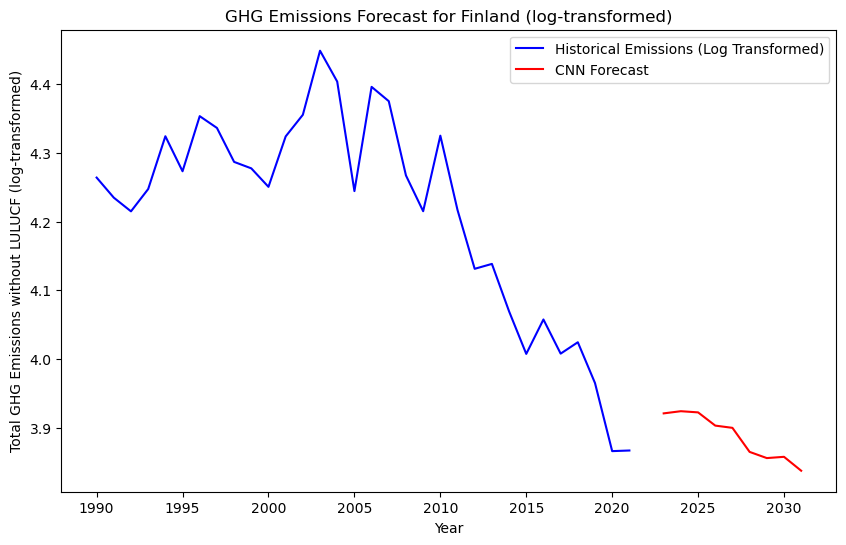

            CNN Forecast
2022-12-31     50.451027
2023-12-31     50.610725
2024-12-31     50.523983
2025-12-31     49.561626
2026-12-31     49.400600
2027-12-31     47.702553
2028-12-31     47.275154
2029-12-31     47.362392
2030-12-31     46.414288


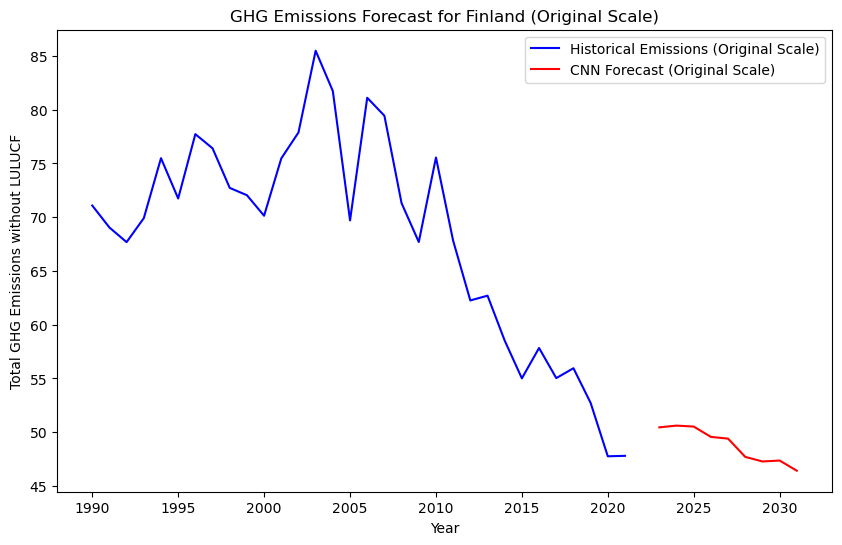

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Metrics for France (Fold 1):
MAE : 0.06484994235914154
MSE : 0.005391839718637165
RMSE : 0.07342914760935991
MAPE : 0.010380619219319515
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Metrics for France (Fold 2):
MAE : 0.10791440760887146
MSE : 0.011950989602027636
RMSE : 0.10932058178599141
MAPE : 0.017402802885511753
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for France (Fold 3):
MAE : 0.4241996522916602
MSE : 0.18104527293204334
RMSE : 0.42549415146631964
MAPE : 0.06896595399752449
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Metrics for France (Fold 4):
MAE : 0.05195969219634241
MSE : 0.0027616809223009755
RMSE : 0.05255169761578569
MAPE : 0.008479033349034564
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Metrics for France (Fold 5):
MAE : 0.03135521926618819
MSE : 0.002011085584899537
RMSE : 0.044845128887088026
MAPE : 0.005226975860560091
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
            CNN Forecast
2022-12-31      6.138554
2023-12-31      6.171537
2024-12-31

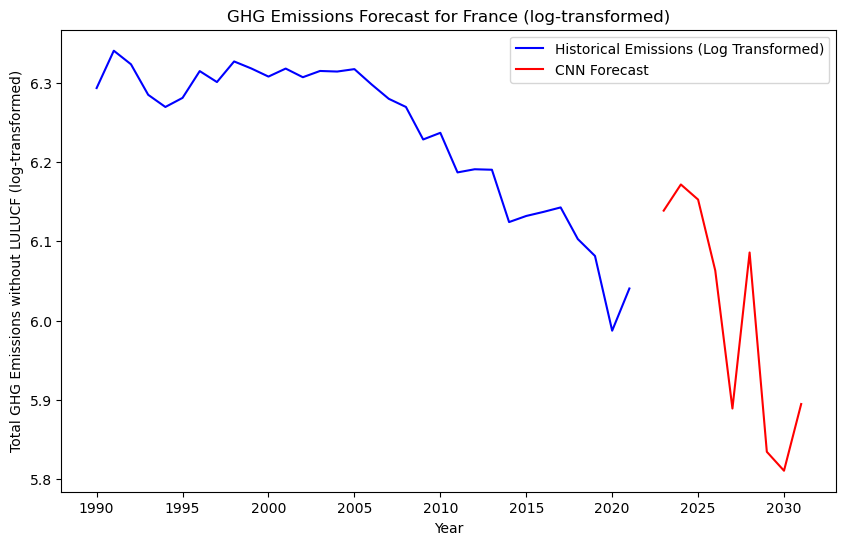

            CNN Forecast
2022-12-31    463.382874
2023-12-31    478.921600
2024-12-31    469.891174
2025-12-31    429.681854
2026-12-31    361.065552
2027-12-31    439.565125
2028-12-31    341.893707
2029-12-31    333.830414
2030-12-31    363.111511


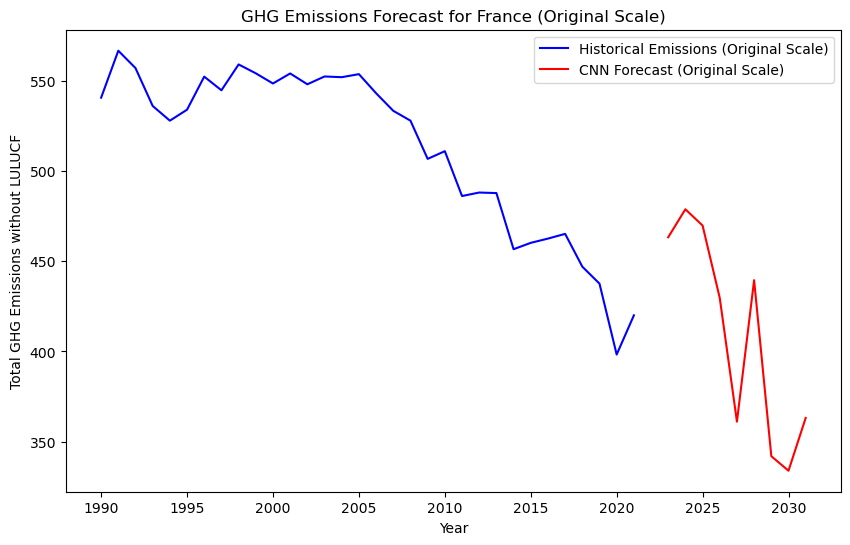

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Metrics for Germany (Fold 1):
MAE : 0.024425807940343287
MSE : 0.0010905355626297402
RMSE : 0.033023257904539645
MAPE : 0.0035823098262167813
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Germany (Fold 2):
MAE : 0.012150231257862742
MSE : 0.00015351012143405418
RMSE : 0.01238992015446646
MAPE : 0.0017816465811074124
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Metrics for Germany (Fold 3):
MAE : 0.13175428018607072
MSE : 0.017538503851370006
RMSE : 0.13243301647010086
MAPE : 0.019339668839310695
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Metrics for Germany (Fold 4):
MAE : 0.014804662179292846
MSE : 0.00038840607232684806
RMSE : 0.019708020507571228
MAPE : 0.002191026066934793
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Metrics for Germany (Fold 5):
MAE : 0.5127560601747266
MSE : 0.2636545399051376
RMSE : 0.5134730176992143
MAPE : 0.07725860313778236
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
            CNN Forecast
2022-12-31      6.765725
2023-12-31      6.681

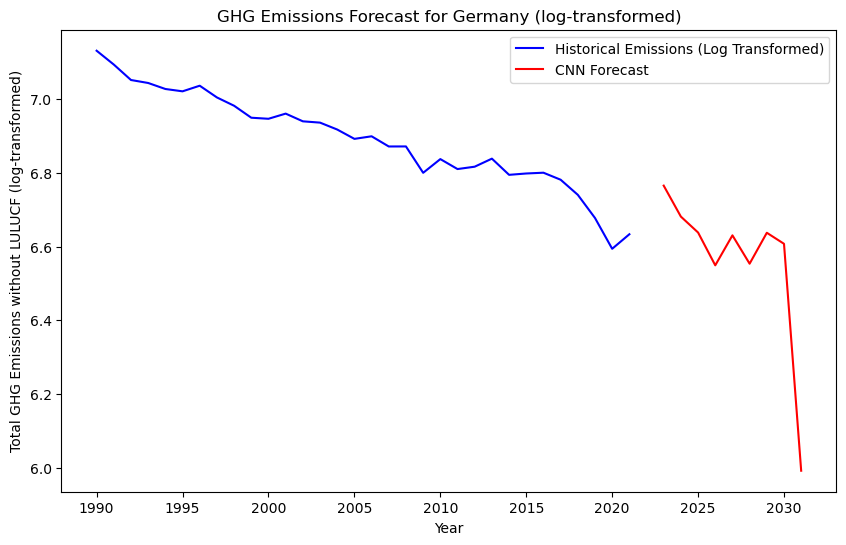

            CNN Forecast
2022-12-31    867.594666
2023-12-31    797.661255
2024-12-31    763.890808
2025-12-31    698.828003
2026-12-31    758.085388
2027-12-31    701.939209
2028-12-31    763.390808
2029-12-31    740.876465
2030-12-31    400.190247


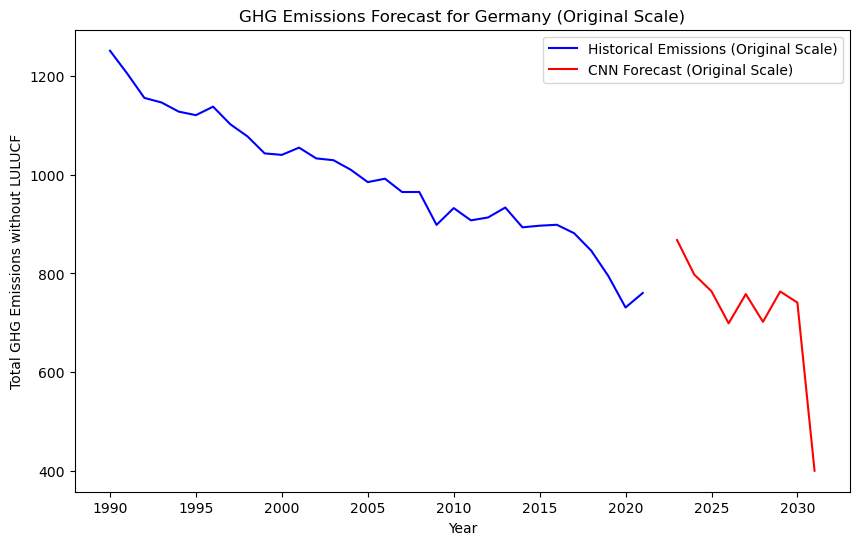

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Metrics for Greece (Fold 1):
MAE : 0.07637462351371453
MSE : 0.009099432959237326
RMSE : 0.09539094799422704
MAPE : 0.015745169930465902
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Metrics for Greece (Fold 2):
MAE : 0.2841961729664009
MSE : 0.08258695526759081
RMSE : 0.28737946215342325
MAPE : 0.059821313432851485
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Metrics for Greece (Fold 3):
MAE : 0.43273141249379715
MSE : 0.18946880623714632
RMSE : 0.4352801468447031
MAPE : 0.09410986123383669
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Metrics for Greece (Fold 4):
MAE : 0.4326012224155947
MSE : 0.18745932071184165
RMSE : 0.4329657269482674
MAPE : 0.09529404728870383
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Metrics for Greece (Fold 5):
MAE : 0.47864974780459385
MSE : 0.23090243256503862
RMSE : 0.48052308223959295
MAPE : 0.10947215824739516
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
            CNN Forecast
2022-12-31      4.328708
2023-12-31      4.456899
2024-12-31      4.44

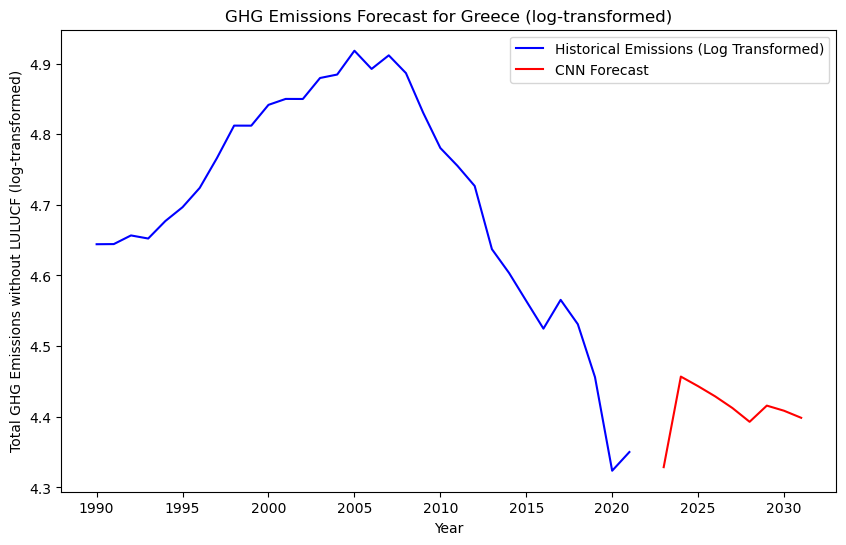

            CNN Forecast
2022-12-31     75.846214
2023-12-31     86.219704
2024-12-31     85.057487
2025-12-31     83.832603
2026-12-31     82.467438
2027-12-31     80.874924
2028-12-31     82.749527
2029-12-31     82.152634
2030-12-31     81.334290


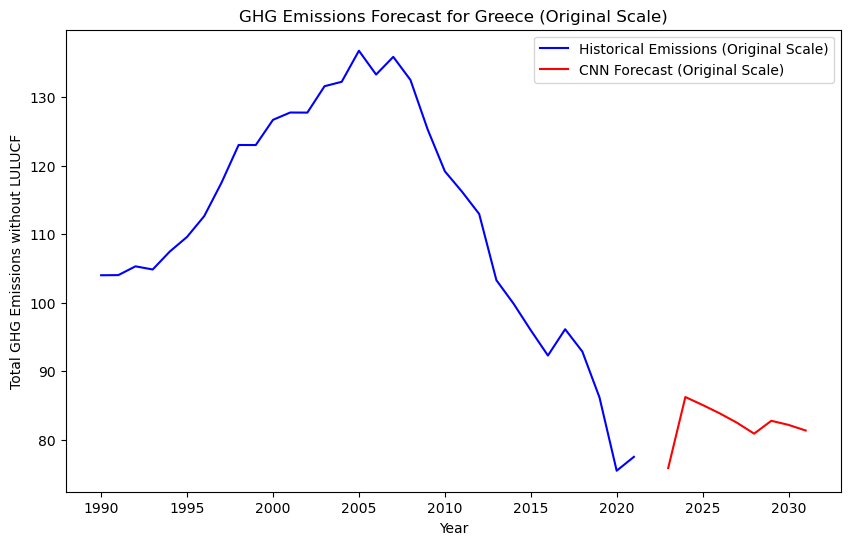

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Metrics for Ireland (Fold 1):
MAE : 0.1993135155960406
MSE : 0.04662166895203244
RMSE : 0.2159205153569999
MAPE : 0.04752036723425083
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Metrics for Ireland (Fold 2):
MAE : 0.39081059467366064
MSE : 0.15614419831137208
RMSE : 0.3951508551317738
MAPE : 0.09532871554907708
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Metrics for Ireland (Fold 3):
MAE : 0.3156964818205668
MSE : 0.0997515012602253
RMSE : 0.3158346106116702
MAPE : 0.07705141358016503
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Metrics for Ireland (Fold 4):
MAE : 0.21168781243573212
MSE : 0.044836915997754856
RMSE : 0.21174729277550364
MAPE : 0.050954601630237704
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Metrics for Ireland (Fold 5):
MAE : 0.18746934559430084
MSE : 0.038216672504382106
RMSE : 0.19549085018072357
MAPE : 0.04568857058240313
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
            CNN Forecast
2022-12-31      4.160949
2023-12-31      4.121217
2024-12-31      3

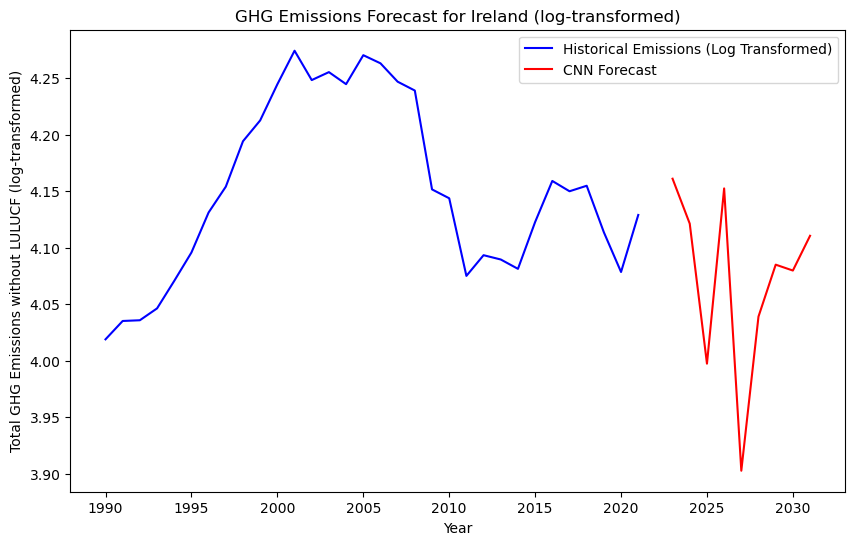

            CNN Forecast
2022-12-31     64.132339
2023-12-31     61.634220
2024-12-31     54.459328
2025-12-31     63.584515
2026-12-31     49.541676
2027-12-31     56.772793
2028-12-31     59.439754
2029-12-31     59.132038
2030-12-31     60.976784


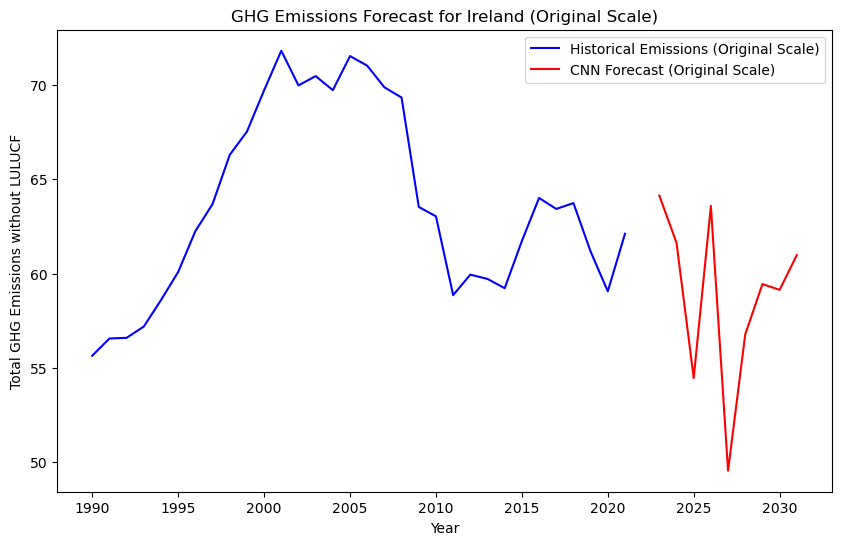

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Metrics for Italy (Fold 1):
MAE : 0.14132534811737654
MSE : 0.024750504845906882
RMSE : 0.1573229317229592
MAPE : 0.022482995758190818
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Italy (Fold 2):
MAE : 0.24413268913664984
MSE : 0.06040674127624492
RMSE : 0.24577782909824256
MAPE : 0.039158254637859345
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Metrics for Italy (Fold 3):
MAE : 0.3037702444249539
MSE : 0.09311976386890451
RMSE : 0.30515531106127664
MAPE : 0.049814795771241184
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Metrics for Italy (Fold 4):
MAE : 0.2726150452419838
MSE : 0.07432898721552693
RMSE : 0.27263343011363617
MAPE : 0.044822886904351156
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Italy (Fold 5):
MAE : 0.2468743009830708
MSE : 0.06347202206316031
RMSE : 0.2519365437231374
MAPE : 0.041107321301073176
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
            CNN Forecast
2022-12-31      6.071351
2023-12-31      5.986989
2024-12-31      6.075411


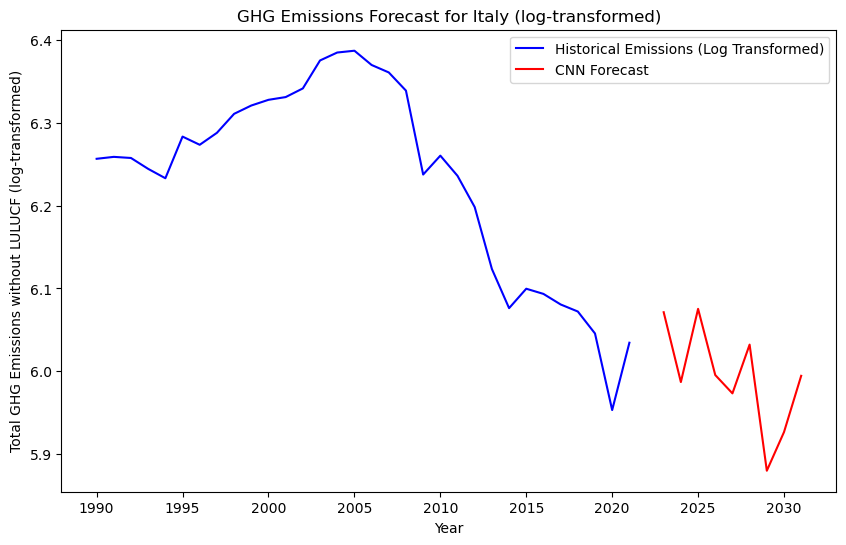

            CNN Forecast
2022-12-31    433.265625
2023-12-31    398.213989
2024-12-31    435.028381
2025-12-31    401.607513
2026-12-31    392.806519
2027-12-31    416.640686
2028-12-31    357.769196
2029-12-31    374.865387
2030-12-31    401.220093


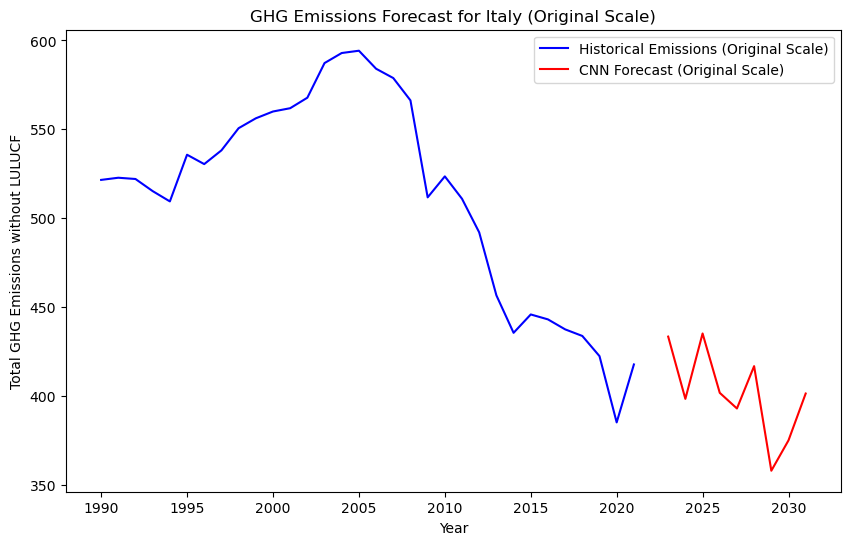

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Japan (Fold 1):
MAE : 0.12039433785875057
MSE : 0.016178654282656215
RMSE : 0.12719533907599057
MAPE : 0.016724944524470264
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Metrics for Japan (Fold 2):
MAE : 0.08846121392479518
MSE : 0.008321630474527032
RMSE : 0.09122297119984106
MAPE : 0.012288315750064496
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Metrics for Japan (Fold 3):
MAE : 0.07387004965516002
MSE : 0.006237365266371035
RMSE : 0.07897699200634976
MAPE : 0.010252895258788251
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Japan (Fold 4):
MAE : 0.11053118062883509
MSE : 0.012620414177565773
RMSE : 0.11234061677579384
MAPE : 0.015462905266550933
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Metrics for Japan (Fold 5):
MAE : 0.11505656905166865
MSE : 0.013344515281353032
RMSE : 0.11551846294576912
MAPE : 0.016282831138207842
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
            CNN Forecast
2022-12-31      7.097685
2023-12-31      7.110756
2024-12-31      

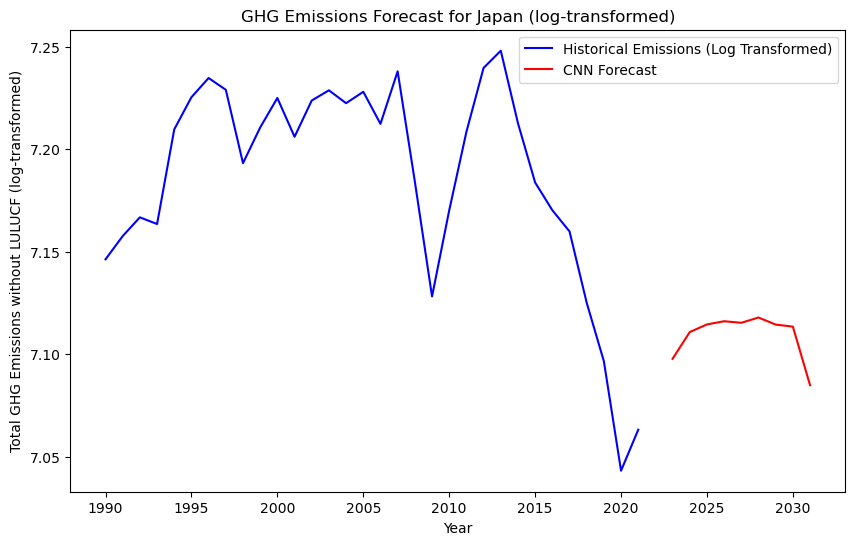

            CNN Forecast
2022-12-31   1209.165039
2023-12-31   1225.073730
2024-12-31   1229.650513
2025-12-31   1231.569946
2026-12-31   1230.626587
2027-12-31   1233.796387
2028-12-31   1229.554932
2029-12-31   1228.328979
2030-12-31   1193.734863


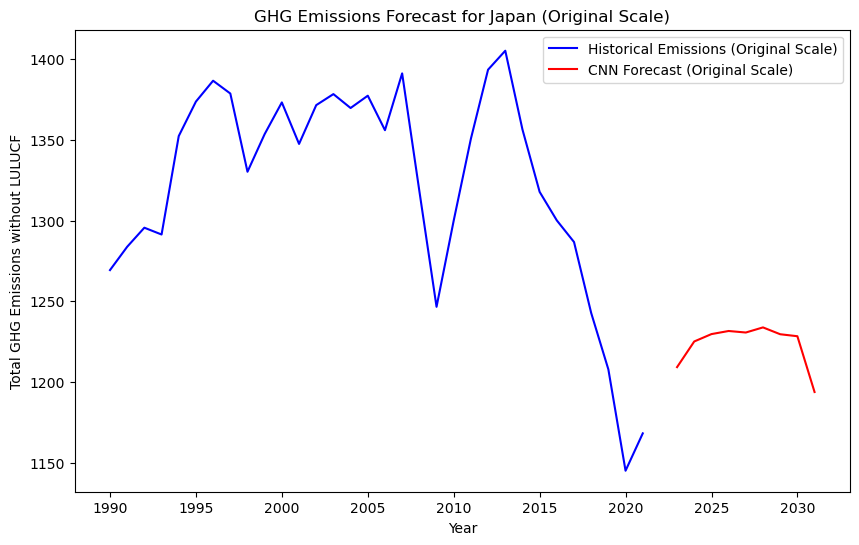

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Metrics for Kazakhstan (Fold 1):
MAE : 0.26673499570873077
MSE : 0.07141020193962444
RMSE : 0.26722687353562413
MAPE : 0.04677412088017591
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Metrics for Kazakhstan (Fold 2):
MAE : 0.36500555776611954
MSE : 0.1337432014871289
RMSE : 0.3657091761046322
MAPE : 0.06358113857265697
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Metrics for Kazakhstan (Fold 3):
MAE : 0.1384614311989525
MSE : 0.019487671951091596
RMSE : 0.13959825196287953
MAPE : 0.023810102617887307
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Metrics for Kazakhstan (Fold 4):
MAE : 0.055017955225800996
MSE : 0.0035538039067940443
RMSE : 0.059613789569142844
MAPE : 0.009299606619218062
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Metrics for Kazakhstan (Fold 5):
MAE : 0.06605930099771395
MSE : 0.0059508480402797465
RMSE : 0.07714173993552224
MAPE : 0.01134949428054974
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
            CNN Forecast
2022-12-31      5.938674
2023-12-31      5.

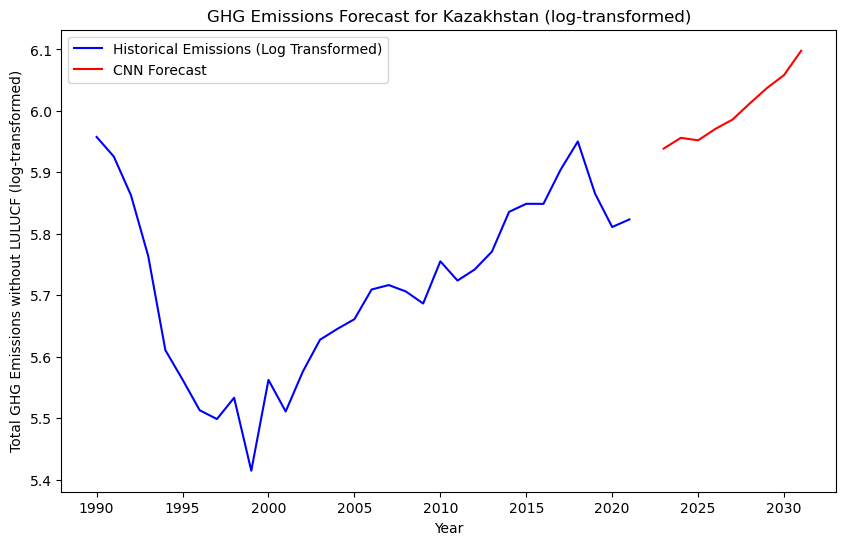

            CNN Forecast
2022-12-31    379.431641
2023-12-31    386.114075
2024-12-31    384.557037
2025-12-31    391.729492
2026-12-31    397.712280
2027-12-31    408.226562
2028-12-31    418.623322
2029-12-31    427.587036
2030-12-31    444.904175


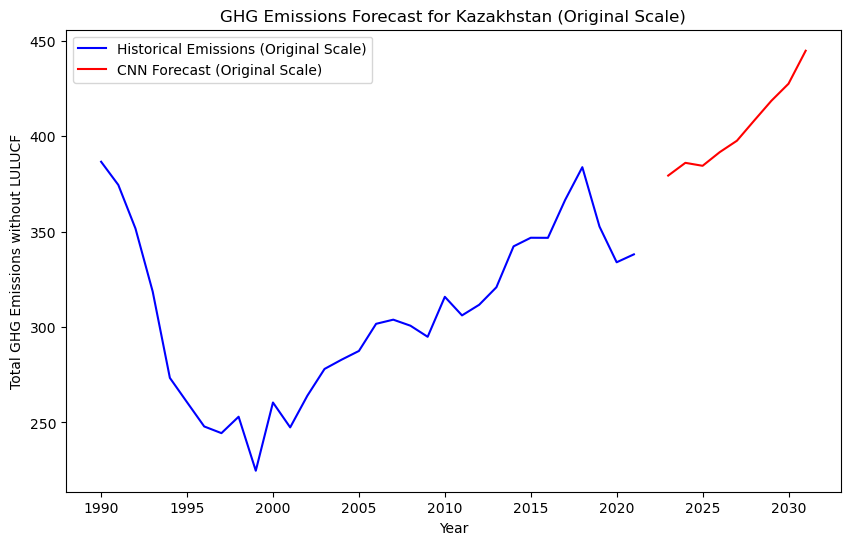

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Metrics for Luxembourg (Fold 1):
MAE : 0.24711564639214453
MSE : 0.06134932431330659
RMSE : 0.24768795754599493
MAPE : 0.09958741952594585
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Metrics for Luxembourg (Fold 2):
MAE : 0.13629947237877596
MSE : 0.023115231967910488
RMSE : 0.15203694277349333
MAPE : 0.05471839946276074
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Luxembourg (Fold 3):
MAE : 0.22882242162350006
MSE : 0.06327430313782452
RMSE : 0.2515438393954909
MAPE : 0.09691258400210505
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Metrics for Luxembourg (Fold 4):
MAE : 0.2670623307906716
MSE : 0.07261155064173318
RMSE : 0.26946530507976935
MAPE : 0.1146559767790613
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Metrics for Luxembourg (Fold 5):
MAE : 0.24359452985062133
MSE : 0.06430545019305826
RMSE : 0.2535851931660409
MAPE : 0.10835198302612409
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
            CNN Forecast
2022-12-31      2.350127
2023-12-31      2.343344
20

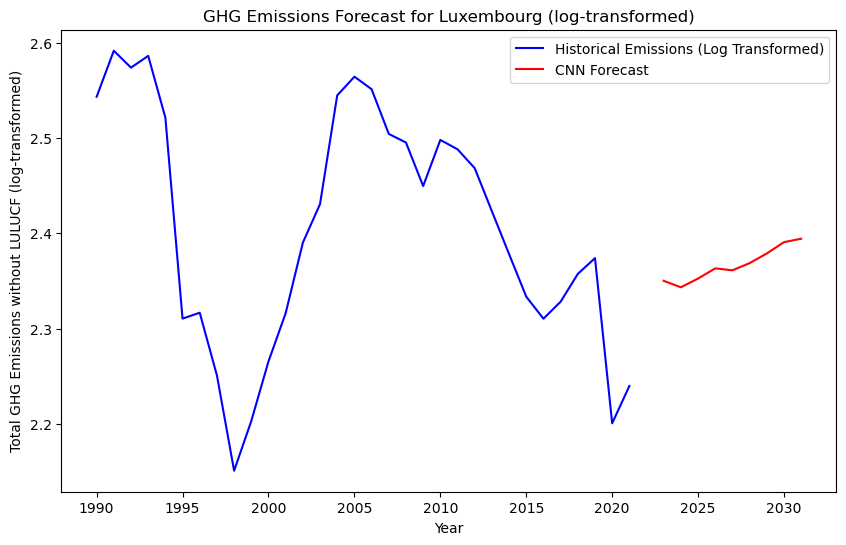

            CNN Forecast
2022-12-31     10.486906
2023-12-31     10.416007
2024-12-31     10.511950
2025-12-31     10.624888
2026-12-31     10.603311
2027-12-31     10.683515
2028-12-31     10.792669
2029-12-31     10.921732
2030-12-31     10.961035


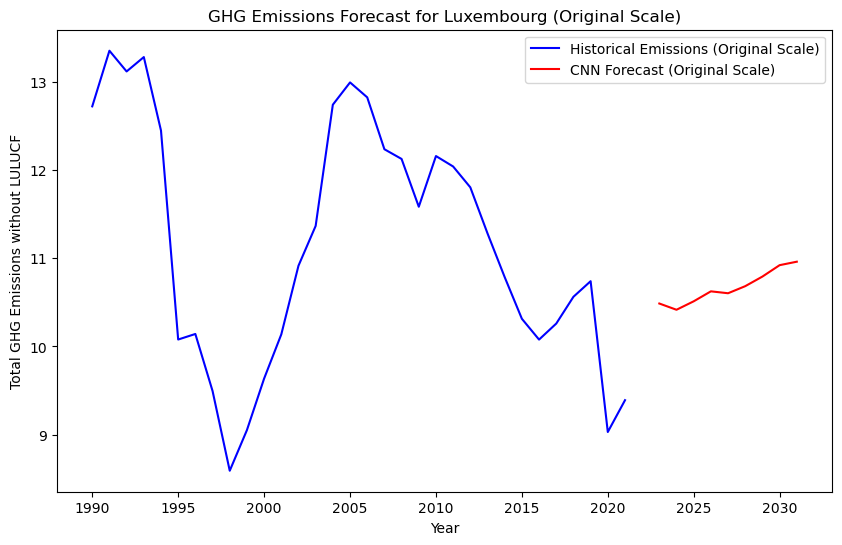

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Metrics for New Zealand (Fold 1):
MAE : 0.1094133044250351
MSE : 0.01269621917568337
RMSE : 0.11267750075185094
MAPE : 0.025096570099091275
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Metrics for New Zealand (Fold 2):
MAE : 0.1800887257740206
MSE : 0.033357453220111674
RMSE : 0.1826402289204426
MAPE : 0.041347370903915416
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Metrics for New Zealand (Fold 3):
MAE : 0.1960098944546577
MSE : 0.038659761712350256
RMSE : 0.19662085777544114
MAPE : 0.04487154582261893
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Metrics for New Zealand (Fold 4):
MAE : 0.017260863587389725
MSE : 0.0004912129813357844
RMSE : 0.02216332514167909
MAPE : 0.00396838629390297
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Metrics for New Zealand (Fold 5):
MAE : 0.12035157429078443
MSE : 0.014786284127446541
RMSE : 0.1215988656503281
MAPE : 0.02761126580746634
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
            CNN Forecast
2022-12-31      4.428488
2023-12-31      

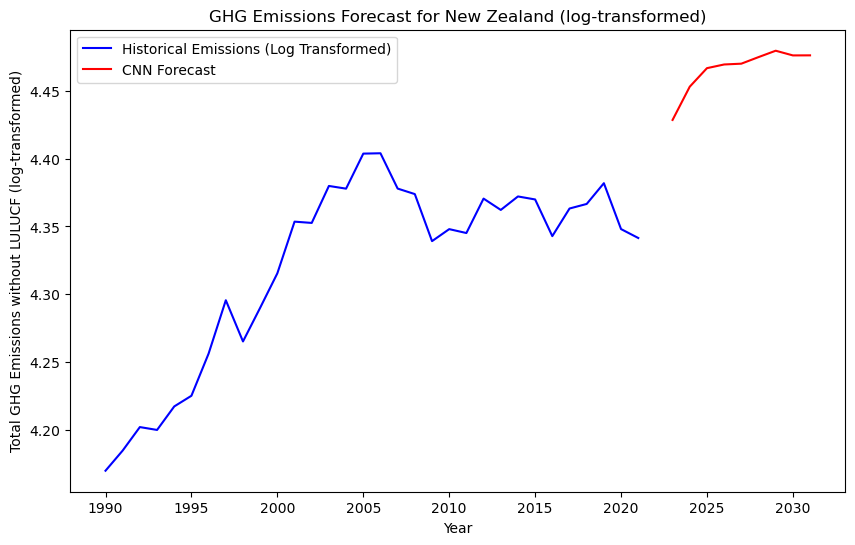

            CNN Forecast
2022-12-31     83.804596
2023-12-31     85.883316
2024-12-31     87.064438
2025-12-31     87.301071
2026-12-31     87.352333
2027-12-31     87.775208
2028-12-31     88.190170
2029-12-31     87.886024
2030-12-31     87.890305


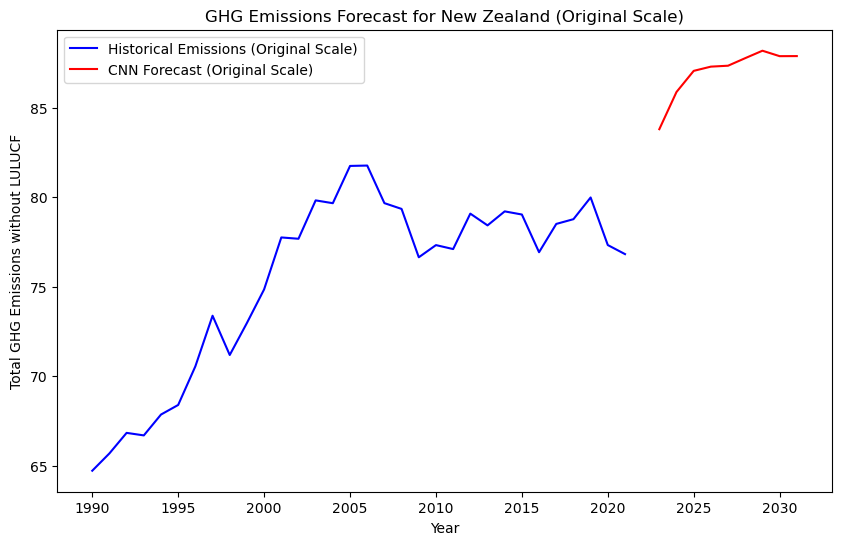

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Metrics for Norway (Fold 1):
MAE : 0.14751582162754748
MSE : 0.022796637722231488
RMSE : 0.1509855546806763
MAPE : 0.03694687344199895
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Metrics for Norway (Fold 2):
MAE : 0.12395691640936664
MSE : 0.01593581016276147
RMSE : 0.12623711879935104
MAPE : 0.03107829703473113
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Metrics for Norway (Fold 3):
MAE : 0.14508167944536346
MSE : 0.021069148795606656
RMSE : 0.14515215739218848
MAPE : 0.03637749768799422
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Metrics for Norway (Fold 4):
MAE : 0.14465459148541848
MSE : 0.02155753241624205
RMSE : 0.1468248358290996
MAPE : 0.03643388355051747
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Metrics for Norway (Fold 5):
MAE : 0.16306951000598616
MSE : 0.027197302331273265
RMSE : 0.16491604631227752
MAPE : 0.04178126017030772
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
            CNN Forecast
2022-12-31      4.049254
2023-12-31      4.076910
2024-12-31      4.0

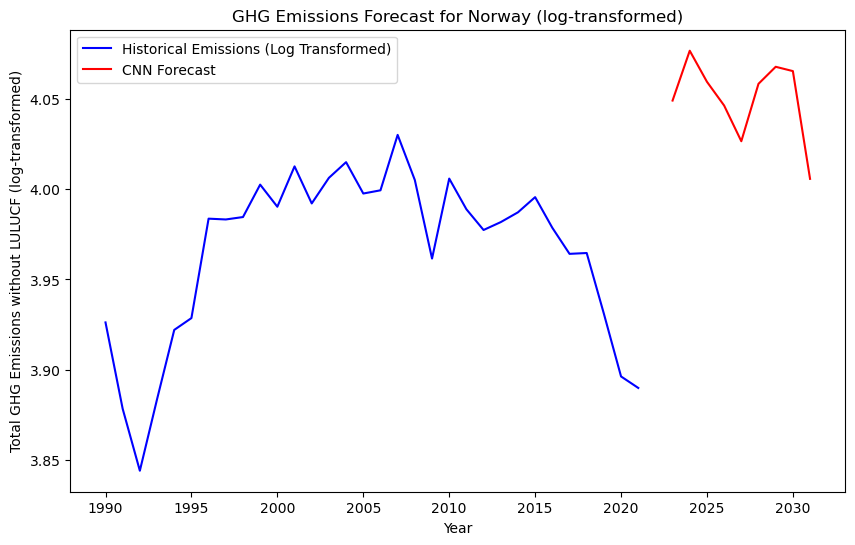

            CNN Forecast
2022-12-31     57.354679
2023-12-31     58.963024
2024-12-31     57.955154
2025-12-31     57.196526
2026-12-31     56.075104
2027-12-31     57.890358
2028-12-31     58.439926
2029-12-31     58.300236
2030-12-31     54.916588


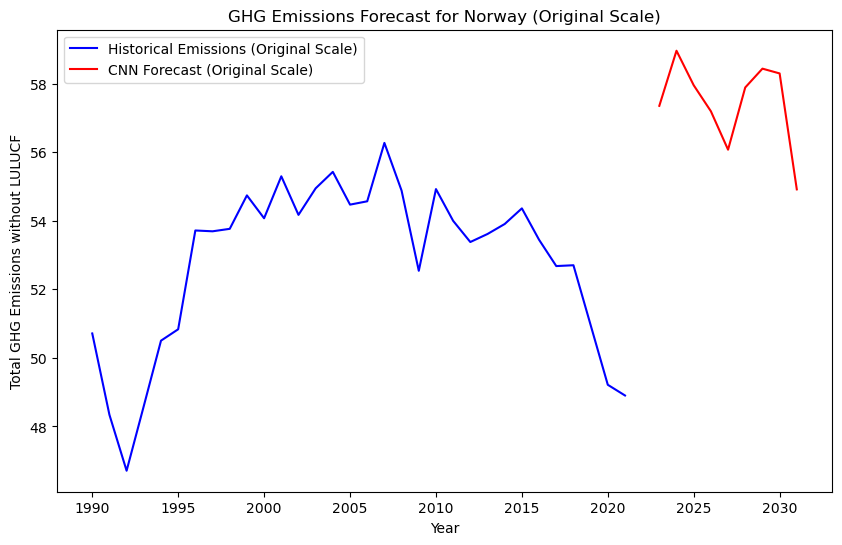

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Poland (Fold 1):
MAE : 0.019211462054528283
MSE : 0.00037912471551380315
RMSE : 0.019471125173286807
MAPE : 0.003201715504355215
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Metrics for Poland (Fold 2):
MAE : 0.1208268305758337
MSE : 0.014741676253768847
RMSE : 0.121415304858032
MAPE : 0.020138134348895456
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Metrics for Poland (Fold 3):
MAE : 0.0537814215493008
MSE : 0.003496699942077797
RMSE : 0.05913290067363343
MAPE : 0.009020002023929245
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Metrics for Poland (Fold 4):
MAE : 0.10407682090640069
MSE : 0.010951665273261406
RMSE : 0.10465020436320899
MAPE : 0.01733665350012464
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Poland (Fold 5):
MAE : 0.0244525031735711
MSE : 0.0007186640465667132
RMSE : 0.026807910149183826
MAPE : 0.004099502961969775
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
            CNN Forecast
2022-12-31      5.962920
2023-12-31      5.957793
2024-12-

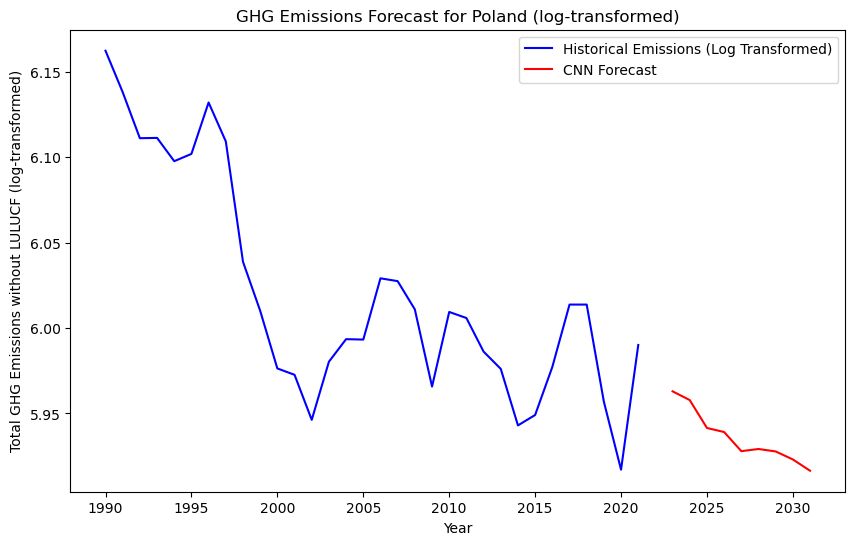

            CNN Forecast
2022-12-31    388.743652
2023-12-31    386.755707
2024-12-31    380.488464
2025-12-31    379.588745
2026-12-31    375.361053
2027-12-31    375.835693
2028-12-31    375.292908
2029-12-31    373.536255
2030-12-31    371.083832


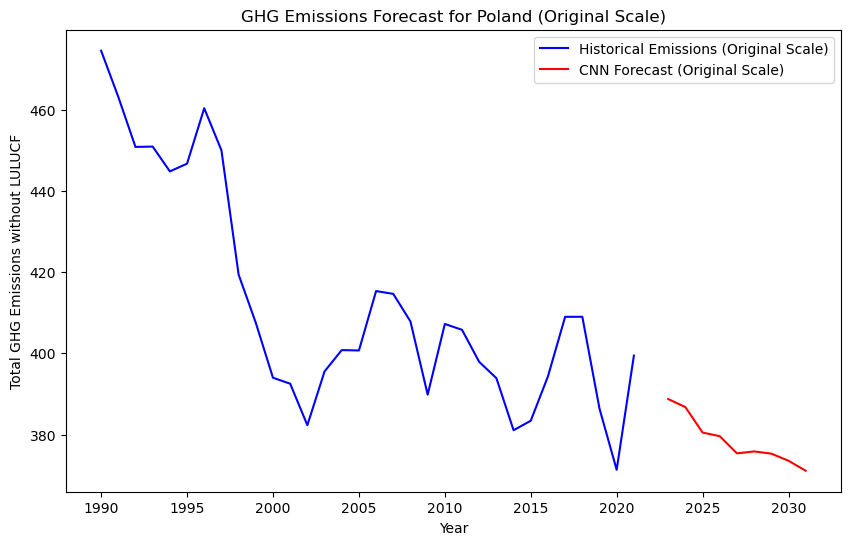

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Portugal (Fold 1):
MAE : 0.20195354785981134
MSE : 0.049067506592215676
RMSE : 0.22151186557883457
MAPE : 0.04668576540594612
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Metrics for Portugal (Fold 2):
MAE : 0.08634803289115241
MSE : 0.008857448330754204
RMSE : 0.09411401771656656
MAPE : 0.020516076946310052
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Metrics for Portugal (Fold 3):
MAE : 0.3142455134522401
MSE : 0.09951981165542713
RMSE : 0.3154676079337261
MAPE : 0.07520857669258155
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Portugal (Fold 4):
MAE : 0.18965935973546552
MSE : 0.03871627480179675
RMSE : 0.1967645161145595
MAPE : 0.044938152267685307
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Portugal (Fold 5):
MAE : 0.17314014938446842
MSE : 0.030861012632434653
RMSE : 0.17567302761788633
MAPE : 0.0424801203735913
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
            CNN Forecast
2022-12-31      4.130138
2023-12-31      4.164581
2024-12-

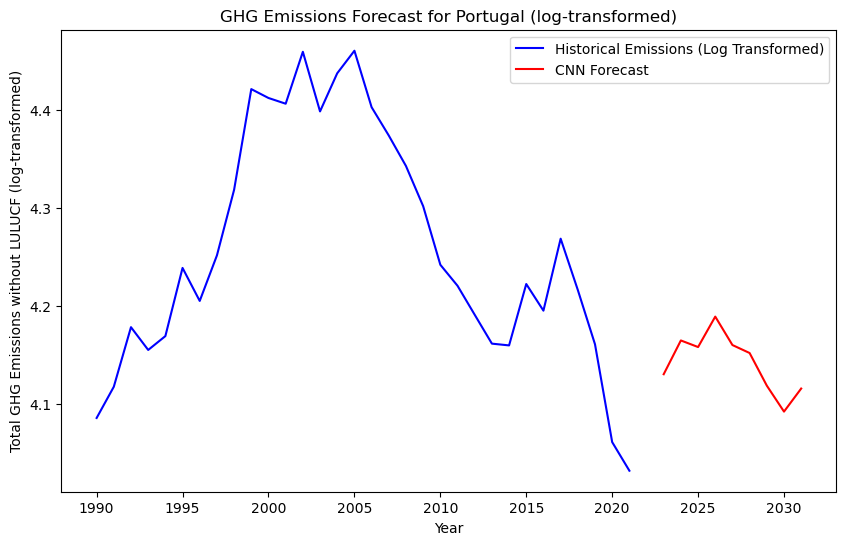

            CNN Forecast
2022-12-31     62.186501
2023-12-31     64.365692
2024-12-31     63.934547
2025-12-31     65.950203
2026-12-31     64.065552
2027-12-31     63.546906
2028-12-31     61.465641
2029-12-31     59.861599
2030-12-31     61.285568


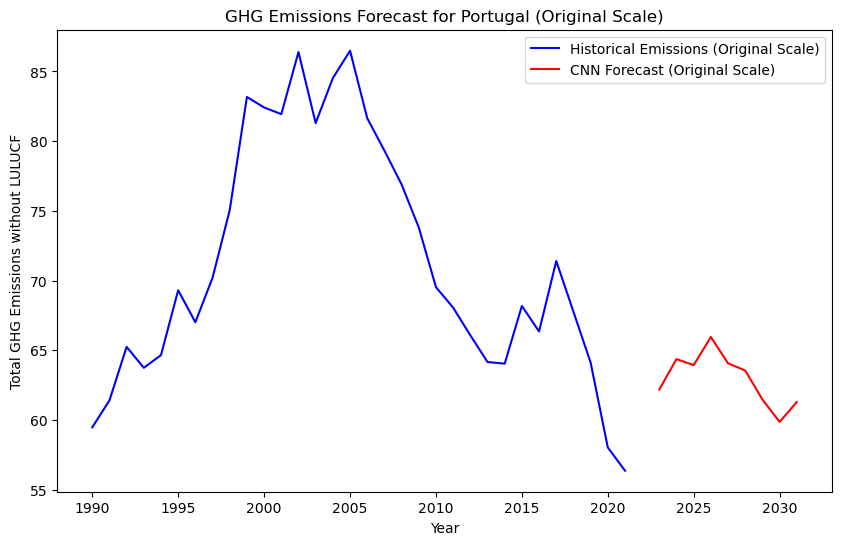

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Metrics for Romania (Fold 1):
MAE : 0.09609194823086871
MSE : 0.010795142002393199
RMSE : 0.10389967277327296
MAPE : 0.019155288377214752
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Metrics for Romania (Fold 2):
MAE : 0.06591416307275318
MSE : 0.004497696273441395
RMSE : 0.06706486616285308
MAPE : 0.013549021118686408
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Metrics for Romania (Fold 3):
MAE : 0.012164186658705667
MSE : 0.0001883703063018074
RMSE : 0.013724806239135304
MAPE : 0.0025486501361291374
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Metrics for Romania (Fold 4):
MAE : 0.00942266873932418
MSE : 0.00010791389023828425
RMSE : 0.010388161061433551
MAPE : 0.0019767335675919275
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Metrics for Romania (Fold 5):
MAE : 0.04850264676972316
MSE : 0.0037772812949786803
RMSE : 0.061459590748545345
MAPE : 0.010212877029024342
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
            CNN Forecast
2022-12-31      4.567578
2023-12-31      4.62

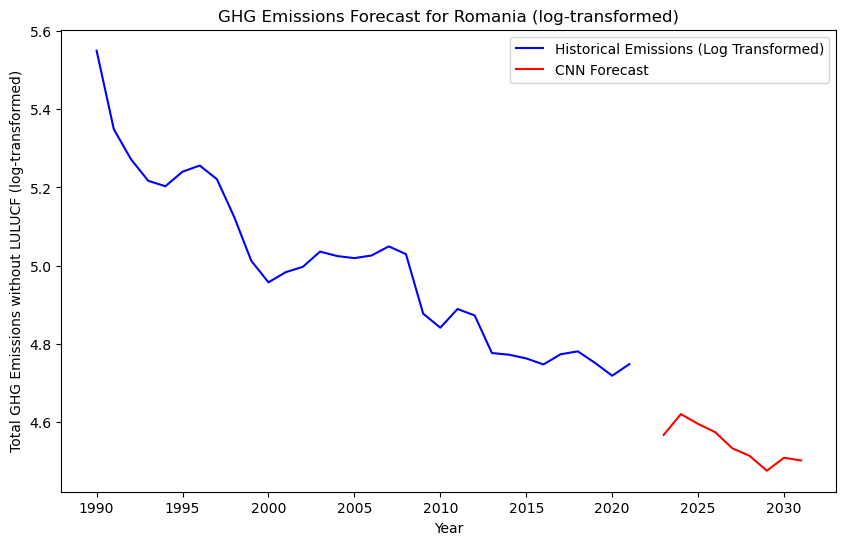

            CNN Forecast
2022-12-31     96.310585
2023-12-31    101.560150
2024-12-31     99.042984
2025-12-31     96.968216
2026-12-31     93.044876
2027-12-31     91.288353
2028-12-31     87.877731
2029-12-31     90.836288
2030-12-31     90.217033


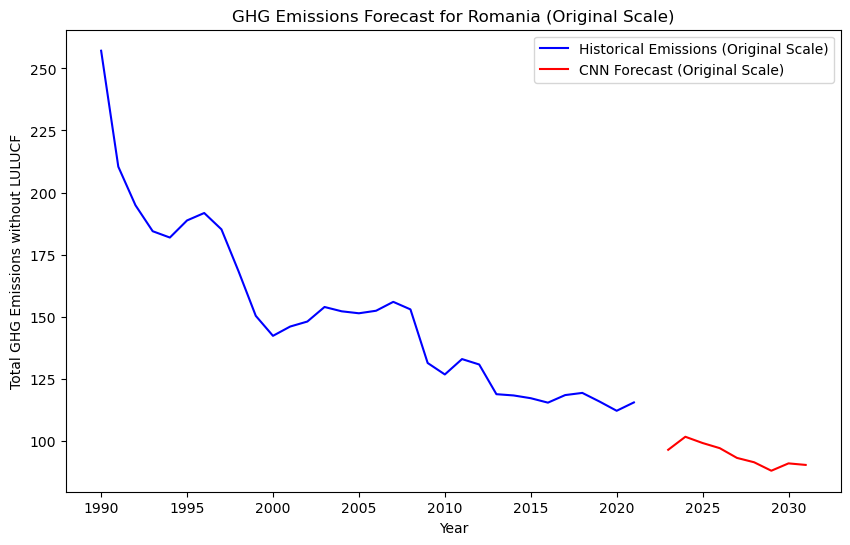

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Metrics for Russian Federation (Fold 1):
MAE : 0.3099529913136312
MSE : 0.09663482042522427
RMSE : 0.3108614167522632
MAPE : 0.04076296844530786
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Metrics for Russian Federation (Fold 2):
MAE : 0.3090721825316045
MSE : 0.09571267614599323
RMSE : 0.3093746533670676
MAPE : 0.04048802982370513
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Metrics for Russian Federation (Fold 3):
MAE : 0.13607241502066714
MSE : 0.01857035329281787
RMSE : 0.13627308352282144
MAPE : 0.017858173499546312
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Metrics for Russian Federation (Fold 4):
MAE : 0.05720242791053624
MSE : 0.0034333650336943722
RMSE : 0.058594923275778525
MAPE : 0.0074793425532998946
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Metrics for Russian Federation (Fold 5):
MAE : 0.04224146208316023
MSE : 0.0018895254842966926
RMSE : 0.04346867244690931
MAPE : 0.005512559847470015
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
            CNN Forecast
202

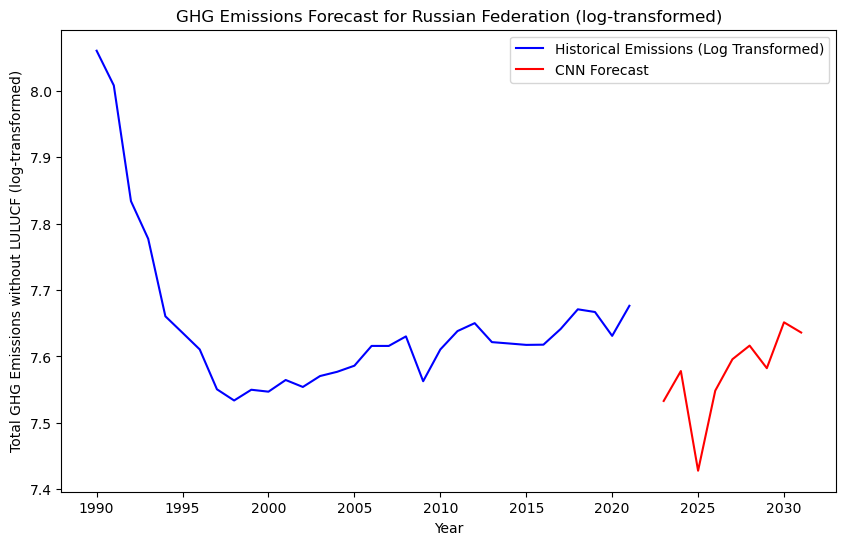

            CNN Forecast
2022-12-31   1868.666626
2023-12-31   1954.825806
2024-12-31   1682.329346
2025-12-31   1897.921021
2026-12-31   1989.828491
2027-12-31   2031.096558
2028-12-31   1963.221802
2029-12-31   2103.603760
2030-12-31   2071.505127


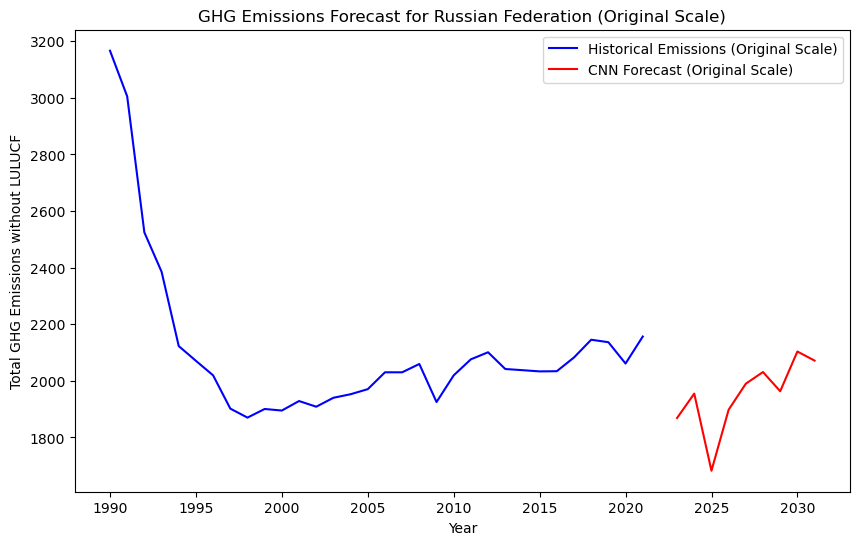

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Metrics for Slovakia (Fold 1):
MAE : 0.09081758886418327
MSE : 0.009480035881739471
RMSE : 0.09736547582043376
MAPE : 0.02341990503072827
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Metrics for Slovakia (Fold 2):
MAE : 0.026244828168578465
MSE : 0.0015807403348726398
RMSE : 0.03975852531058766
MAPE : 0.006987145968656687
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Metrics for Slovakia (Fold 3):
MAE : 0.031024430339347802
MSE : 0.0010929755512494217
RMSE : 0.03306018075040458
MAPE : 0.008368099614283996
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Metrics for Slovakia (Fold 4):
MAE : 0.08796009933119346
MSE : 0.00836616838677002
RMSE : 0.09146676110352886
MAPE : 0.0235156571767286
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Metrics for Slovakia (Fold 5):
MAE : 0.050922635325206876
MSE : 0.004224778348857837
RMSE : 0.06499829496885158
MAPE : 0.013781928045216168
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
            CNN Forecast
2022-12-31      3.556905
2023-12-31      3.5678

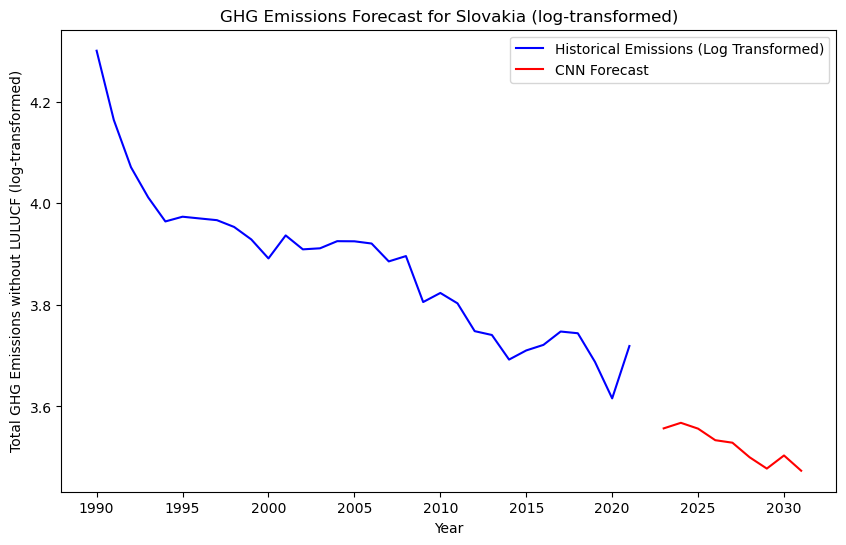

            CNN Forecast
2022-12-31     35.054535
2023-12-31     35.440945
2024-12-31     35.035713
2025-12-31     34.248470
2026-12-31     34.079746
2027-12-31     33.116566
2028-12-31     32.386494
2029-12-31     33.233421
2030-12-31     32.250565


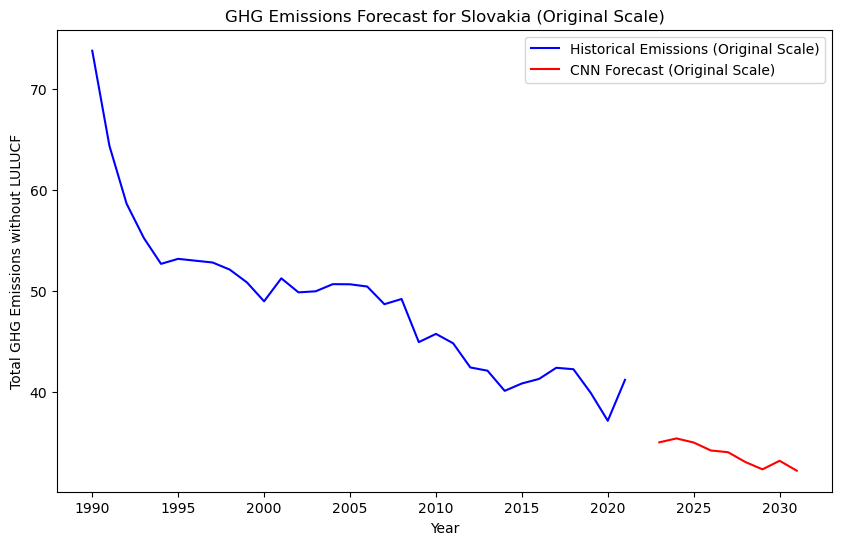

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Spain (Fold 1):
MAE : 0.3076867879658147
MSE : 0.10608498629250353
RMSE : 0.32570690243300576
MAPE : 0.05101239996970949
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Metrics for Spain (Fold 2):
MAE : 0.37458140911345605
MSE : 0.1414353842338546
RMSE : 0.37607896010526115
MAPE : 0.06388363780280022
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Spain (Fold 3):
MAE : 0.4424851635887288
MSE : 0.19603485166188175
RMSE : 0.44275823161391564
MAPE : 0.07648636853505685
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Spain (Fold 4):
MAE : 0.3721945621790083
MSE : 0.13880715779973896
RMSE : 0.3725683263506695
MAPE : 0.06424471896687424
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Metrics for Spain (Fold 5):
MAE : 0.06169186857891488
MSE : 0.004035391888056536
RMSE : 0.06352473445876446
MAPE : 0.010907135501352546
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
            CNN Forecast
2022-12-31      5.885851
2023-12-31      5.681780
2024-12-31      5.861973
2025-

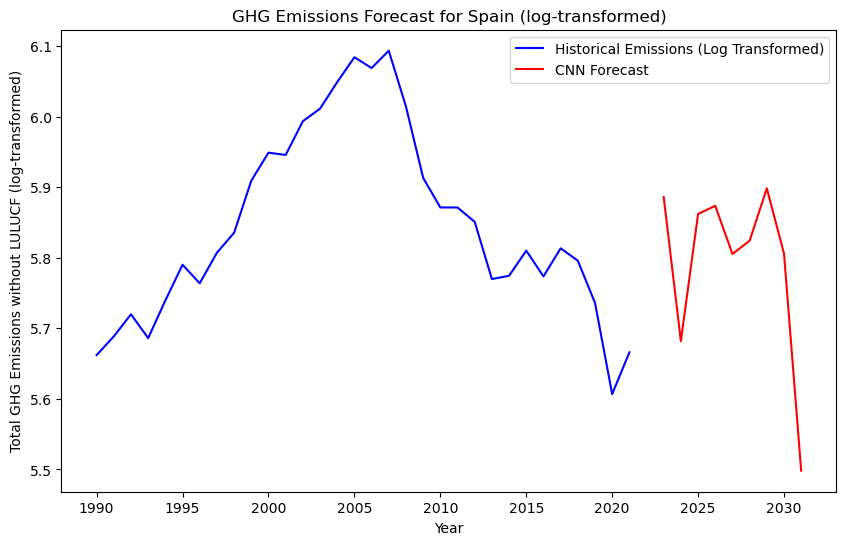

            CNN Forecast
2022-12-31    359.908905
2023-12-31    293.471313
2024-12-31    351.416901
2025-12-31    355.474884
2026-12-31    332.033325
2027-12-31    338.306610
2028-12-31    364.390167
2029-12-31    332.240814
2030-12-31    244.244308


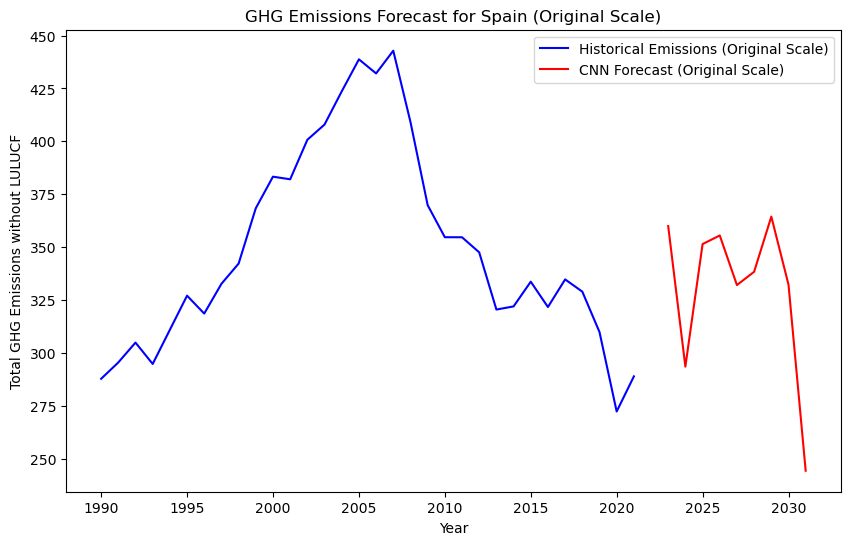

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Sweden (Fold 1):
MAE : 0.08288765893443036
MSE : 0.007302625884400028
RMSE : 0.085455402897652
MAPE : 0.020143918286430886
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Metrics for Sweden (Fold 2):
MAE : 0.033243966282192915
MSE : 0.0017004126128348585
RMSE : 0.041236059618189255
MAPE : 0.008158903517383147
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Sweden (Fold 3):
MAE : 0.13172418975248057
MSE : 0.017581861238165932
RMSE : 0.13259661096033312
MAPE : 0.032999721910602735
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Metrics for Sweden (Fold 4):
MAE : 0.07638545237963301
MSE : 0.005858026722544094
RMSE : 0.07653774704382207
MAPE : 0.019274191787065027
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Sweden (Fold 5):
MAE : 0.11676151366643299
MSE : 0.014844459960651266
RMSE : 0.12183784289231021
MAPE : 0.03022069163323504
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
            CNN Forecast
2022-12-31      3.860719
2023-12-31      3.860668
2024-12-31

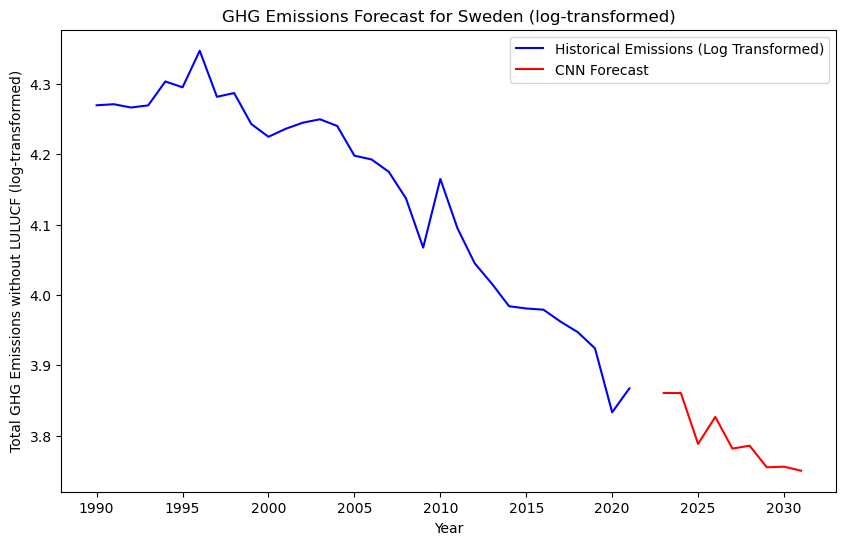

            CNN Forecast
2022-12-31     47.499508
2023-12-31     47.497055
2024-12-31     44.185314
2025-12-31     45.914162
2026-12-31     43.892281
2027-12-31     44.075279
2028-12-31     42.740452
2029-12-31     42.779549
2030-12-31     42.534435


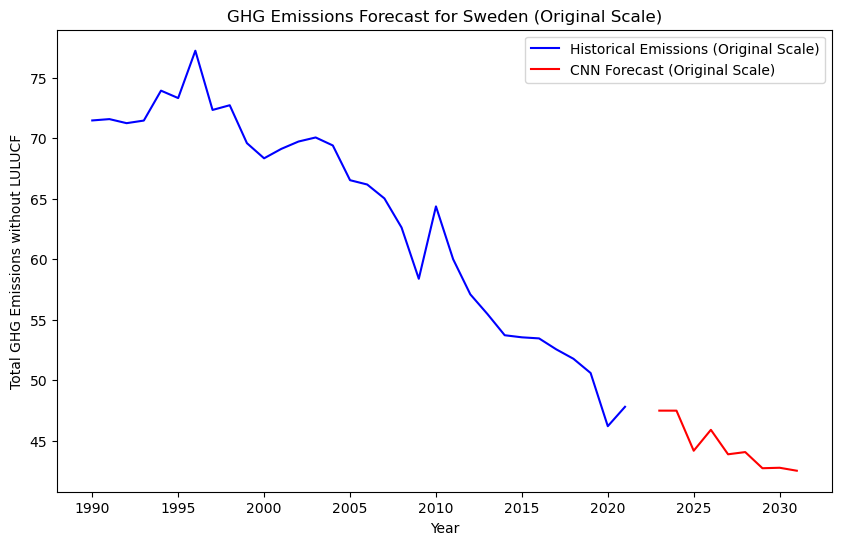

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Metrics for Switzerland (Fold 1):
MAE : 0.013755159794446895
MSE : 0.0002743679347323833
RMSE : 0.016564055503782378
MAPE : 0.0034417262724451177
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Metrics for Switzerland (Fold 2):
MAE : 0.0417643161241803
MSE : 0.0025997920669072506
RMSE : 0.05098815614343444
MAPE : 0.01058065848406446
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Switzerland (Fold 3):
MAE : 0.07311484943287742
MSE : 0.007290295817616944
RMSE : 0.08538322913556821
MAPE : 0.0187522794055611
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Switzerland (Fold 4):
MAE : 0.07965445970878848
MSE : 0.006523302250837397
RMSE : 0.08076696261985712
MAPE : 0.020589129897515882
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Metrics for Switzerland (Fold 5):
MAE : 0.13846286152372547
MSE : 0.019820573134107015
RMSE : 0.14078555726390052
MAPE : 0.036307555794593514
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
            CNN Forecast
2022-12-31      3.738650
2023-12-3

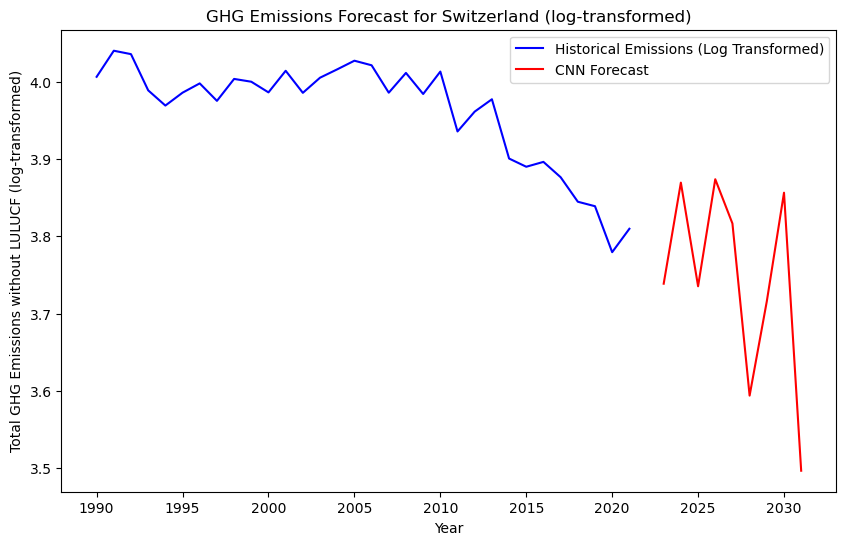

            CNN Forecast
2022-12-31     42.041210
2023-12-31     47.909130
2024-12-31     41.901924
2025-12-31     48.120644
2026-12-31     45.444523
2027-12-31     36.378464
2028-12-31     41.101276
2029-12-31     47.290035
2030-12-31     33.011673


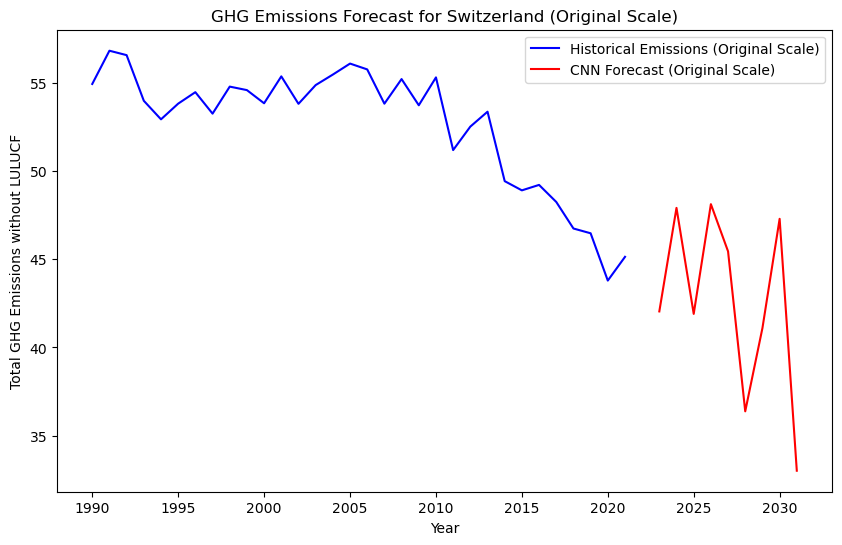

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Metrics for Türkiye (Fold 1):
MAE : 0.02277627414671161
MSE : 0.0008027604894575321
RMSE : 0.028333028243686414
MAPE : 0.0038159528127435158
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Metrics for Türkiye (Fold 2):
MAE : 0.03488896198887156
MSE : 0.0014547387022774375
RMSE : 0.038141036984820395
MAPE : 0.005769497746808231
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Metrics for Türkiye (Fold 3):
MAE : 0.013693661311837543
MSE : 0.0001942898347333346
RMSE : 0.013938788854607654
MAPE : 0.0022344114702828326
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Metrics for Türkiye (Fold 4):
MAE : 0.10235628987083463
MSE : 0.012510410781958475
RMSE : 0.11184994761714677
MAPE : 0.016362827605576825
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Metrics for Türkiye (Fold 5):
MAE : 0.1399514588052746
MSE : 0.020478303006454427
RMSE : 0.1431024213857139
MAPE : 0.022331979609735545
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
            CNN Forecast
2022-12-31      6.394362
2023-12-31      6.4148

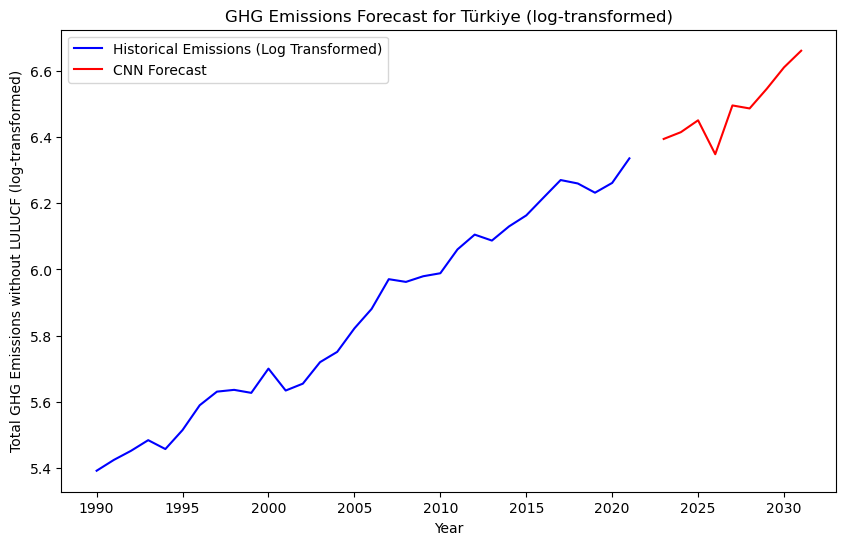

            CNN Forecast
2022-12-31    598.461365
2023-12-31    610.871460
2024-12-31    633.189331
2025-12-31    571.463928
2026-12-31    662.291077
2027-12-31    656.307861
2028-12-31    696.597229
2029-12-31    743.023926
2030-12-31    781.412231


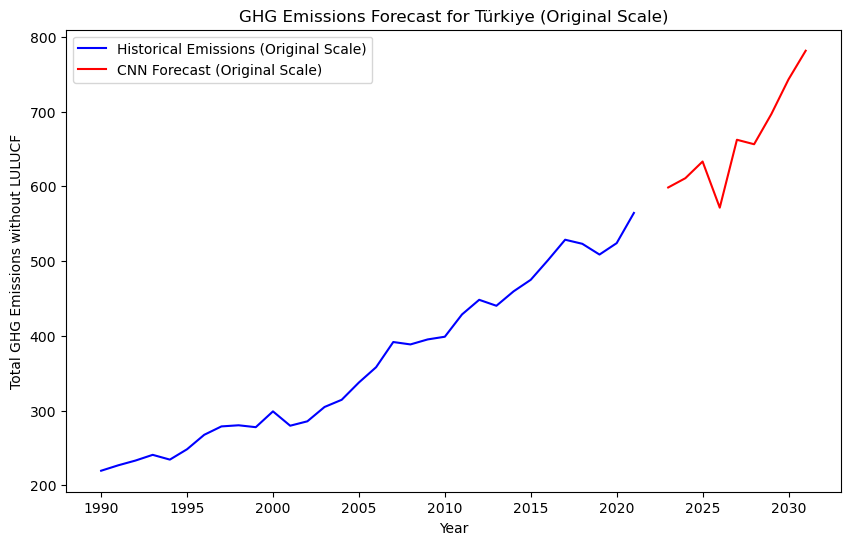

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Ukraine (Fold 1):
MAE : 0.3291208934152217
MSE : 0.11030434239908155
RMSE : 0.3321209755481902
MAPE : 0.054125272072934306
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Metrics for Ukraine (Fold 2):
MAE : 0.23656550653150651
MSE : 0.059047789035177656
RMSE : 0.24299750829005975
MAPE : 0.0391692988995709
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Metrics for Ukraine (Fold 3):
MAE : 0.13396800120440075
MSE : 0.02791327037217051
RMSE : 0.1670726499824867
MAPE : 0.0224546556744537
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Metrics for Ukraine (Fold 4):
MAE : 0.03247090040937609
MSE : 0.0011866081446079899
RMSE : 0.03444717905152742
MAPE : 0.0055830759105939464
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Metrics for Ukraine (Fold 5):
MAE : 0.02713107763909761
MSE : 0.0014079986234285505
RMSE : 0.03752330773570676
MAPE : 0.004681778682627535
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
            CNN Forecast
2022-12-31      5.549517
2023-12-31      5.609730
2024-12-31

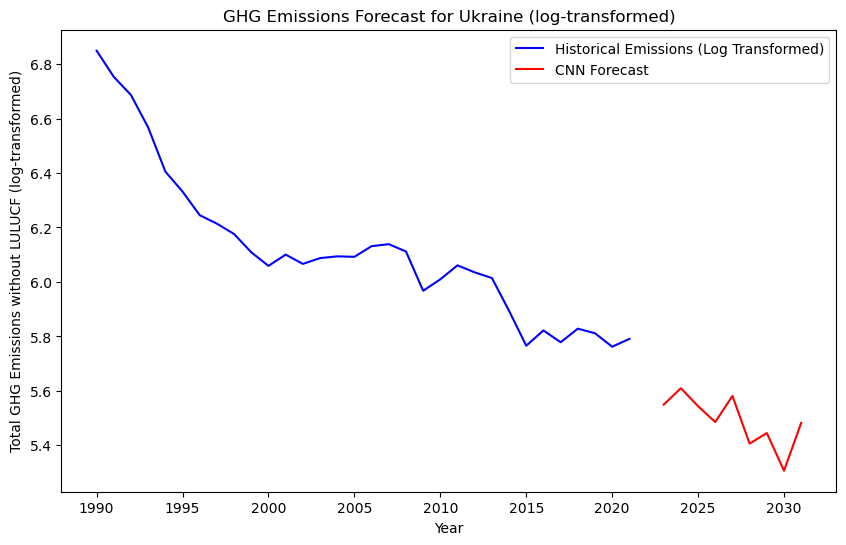

            CNN Forecast
2022-12-31    257.113251
2023-12-31    273.070587
2024-12-31    255.612228
2025-12-31    241.186371
2026-12-31    265.443604
2027-12-31    222.802414
2028-12-31    231.620743
2029-12-31    201.703613
2030-12-31    240.411682


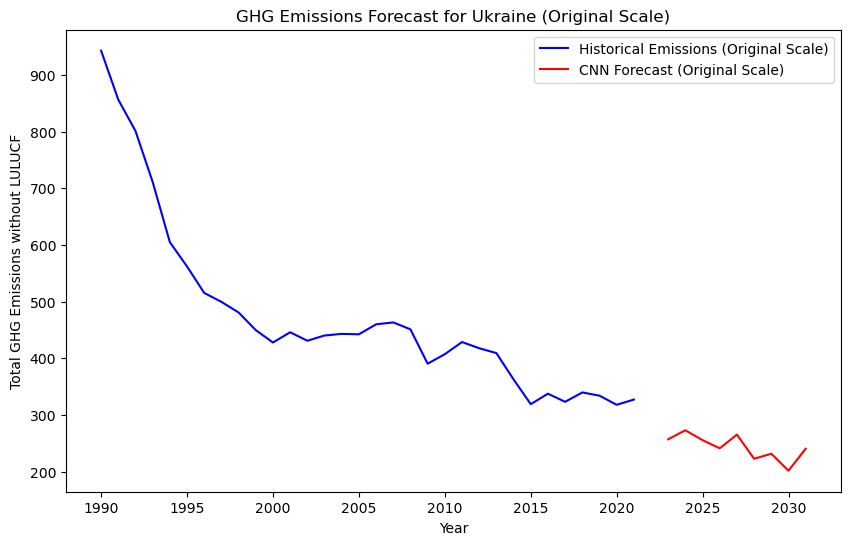

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Metrics for United Kingdom of Great Britain and Northern Ireland (Fold 1):
MAE : 0.21931538686110544
MSE : 0.04979272346555585
RMSE : 0.22314283198336407
MAPE : 0.033946007398545565
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Metrics for United Kingdom of Great Britain and Northern Ireland (Fold 2):
MAE : 0.10255385838195696
MSE : 0.011852324247730486
RMSE : 0.10886838038535562
MAPE : 0.01610056762745092
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Metrics for United Kingdom of Great Britain and Northern Ireland (Fold 3):
MAE : 0.04416077113157968
MSE : 0.0021507095041093873
RMSE : 0.04637574262596112
MAPE : 0.00703114703474306
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for United Kingdom of Great Britain and Northern Ireland (Fold 4):
MAE : 0.24403376045858996
MSE : 0.05964405097995348
RMSE : 0.24422131557248125
MAPE : 0.039563989944433976
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Metrics for United Kingdom of Great Britain and Northern Ireland (Fold 5):
MAE :

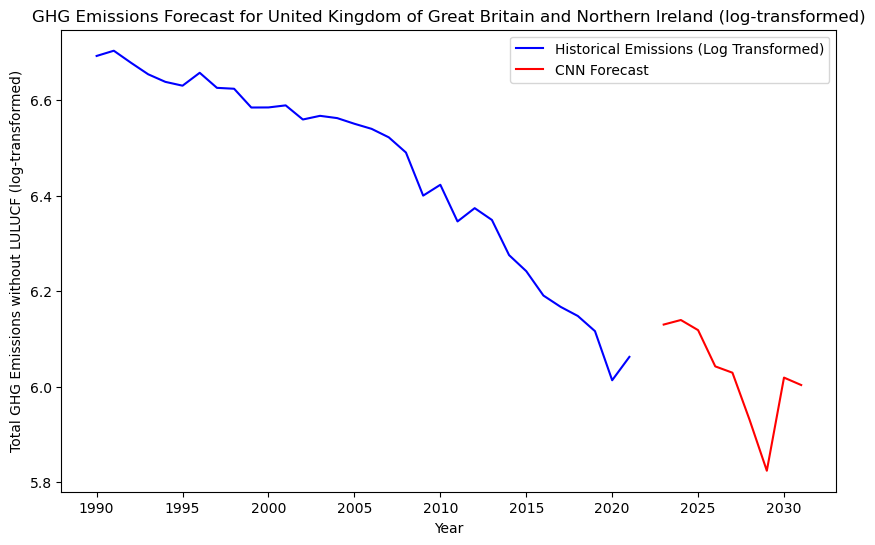

            CNN Forecast
2022-12-31    459.540955
2023-12-31    463.935181
2024-12-31    454.207489
2025-12-31    421.019562
2026-12-31    415.484833
2027-12-31    376.390533
2028-12-31    338.420532
2029-12-31    411.253540
2030-12-31    404.909454


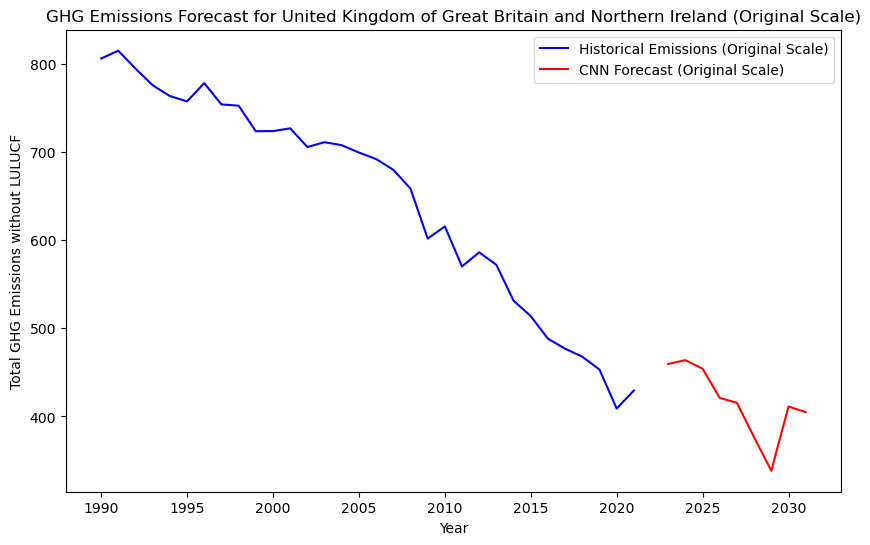

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Metrics for United States of America (Fold 1):
MAE : 0.09462286055933511
MSE : 0.011077648849505572
RMSE : 0.1052504102106285
MAPE : 0.010674888331364466
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Metrics for United States of America (Fold 2):
MAE : 0.1537407930870843
MSE : 0.02443181469522522
RMSE : 0.15630679670195158
MAPE : 0.01740798715468781
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Metrics for United States of America (Fold 3):
MAE : 0.12514825610433414
MSE : 0.01594620666725152
RMSE : 0.12627829056196285
MAPE : 0.014177514354976911
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Metrics for United States of America (Fold 4):
MAE : 0.047840149941934605
MSE : 0.002479578147224554
RMSE : 0.0497953627080329
MAPE : 0.005439009147813831
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Metrics for United States of America (Fold 5):
MAE : 0.10836609564625199
MSE : 0.012556422203921893
RMSE : 0.11205544254484873
MAPE : 0.012392858397232824
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/s

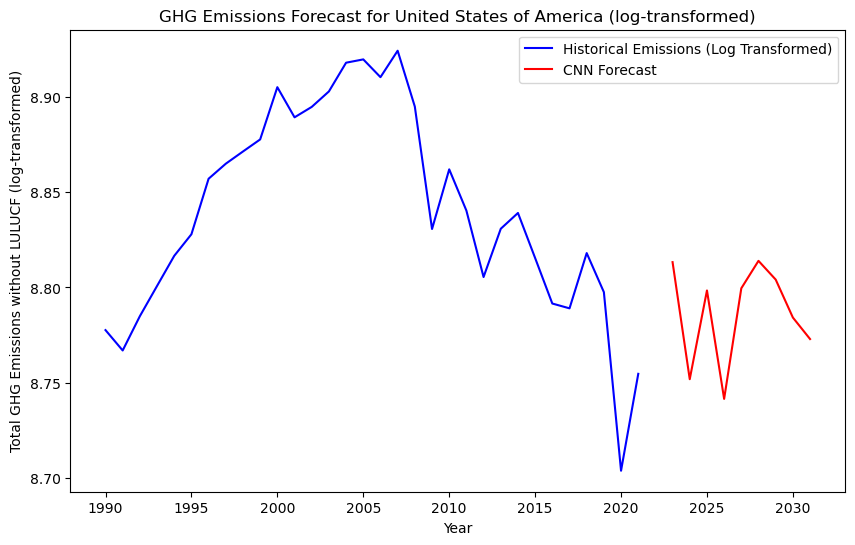

            CNN Forecast
2022-12-31   6722.851562
2023-12-31   6322.398926
2024-12-31   6623.750977
2025-12-31   6257.429199
2026-12-31   6631.221191
2027-12-31   6727.424805
2028-12-31   6661.563965
2029-12-31   6530.238281
2030-12-31   6456.984863


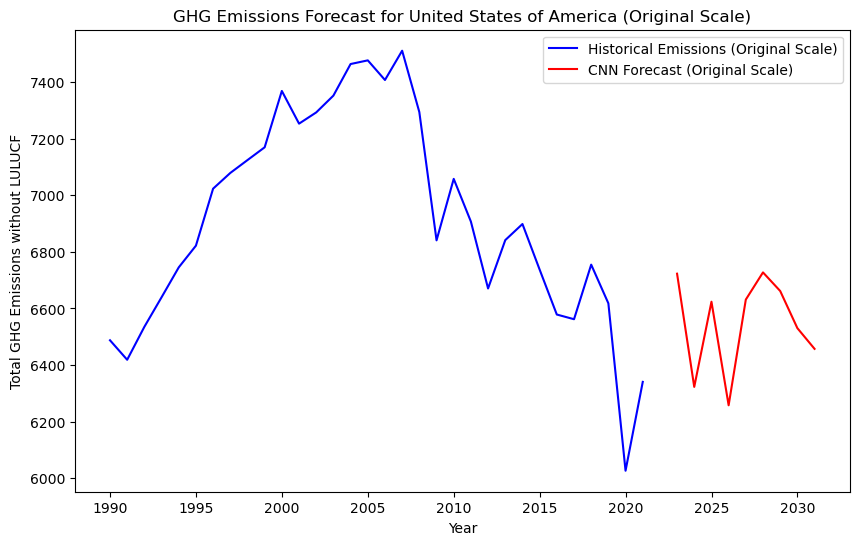

In [10]:
all_results = pd.DataFrame()

for country in emissions_log['Country'].unique():
    country_data = select_country(emissions_log, country, features, target)
    
    X = country_data[features].values
    y = country_data[target].values

    X_seq, y_seq = split_sequence(X, y, n_in, n_out)

    n_features = X_seq.shape[2]
    
    tscv = TimeSeriesSplit(n_splits=5)
    
    for fold, (train_index, test_index) in enumerate(tscv.split(X_seq)):
        X_train, X_test = X_seq[train_index], X_seq[test_index]
        y_train, y_test = y_seq[train_index], y_seq[test_index]

        model = build_and_train_model(X_train, y_train, n_in, n_features, n_out, epochs=epochs, learning_rate=learning_rate)

        yhat = model.predict(X_test)
        
        yhat = yhat[:, -1]
        y_test = y_test[:, -1]

        print(f"Metrics for {country} (Fold {fold + 1}):")
        metric(yhat, y_test)
    
    input_seq = X[-n_in:].reshape((1, n_in, n_features))
    forecast = model.predict(input_seq)[0]

    num_periods = n_out
    Year = pd.date_range(start=str(start_year), periods=num_periods, freq='A')
    CNN_fcast_df = pd.DataFrame(forecast, index=Year[:num_periods], columns=['CNN Forecast'])
   
    country_data_original_scale = np.exp(country_data)
    CNN_fcast_original_scale = np.exp(forecast)
    CNN_fcast_df_original_scale = pd.DataFrame(CNN_fcast_original_scale, index=Year, columns=['CNN Forecast'])

    country_results = pd.concat([CNN_fcast_df, CNN_fcast_df_original_scale], axis=1)
    country_results['Country'] = country
    all_results = pd.concat([all_results, country_results])
    
    print(CNN_fcast_df)
    plt.figure(figsize=(10, 6))
    plt.plot(country_data.index, y, label='Historical Emissions (Log Transformed)', color='blue')
    plt.plot(CNN_fcast_df, label='CNN Forecast', color='red')
    plt.xlabel('Year')
    plt.ylabel('Total GHG Emissions without LULUCF (log-transformed)')
    plt.legend()
    plt.title(f'GHG Emissions Forecast for {country} (log-transformed)')
    plt.show() 
    print(CNN_fcast_df_original_scale)


    plt.figure(figsize=(10, 6))
    plt.plot(country_data_original_scale.index, country_data_original_scale[target], label='Historical Emissions (Original Scale)', color='blue')
    plt.plot(CNN_fcast_df_original_scale, label='CNN Forecast (Original Scale)', color='red')
    plt.xlabel('Year')
    plt.ylabel('Total GHG Emissions without LULUCF')
    plt.legend()
    plt.title(f'GHG Emissions Forecast for {country} (Original Scale)')
    plt.show()